## Background and reference

**Diabetes Health Indicators Dataset**

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system

https://www.cdc.gov/brfss/annual_data/annual_data.htm

**Data Background:**

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year ~~2015~~ **2022** was used.

This original dataset contains responses from **445,132** individuals and has **328** features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.


------------------------------------------------------------------------------

BRFSS 2022 Codebook: link https://www.cdc.gov/brfss/annual_data/2022/pdf/2022-calculated-variables-version4-508.pdf
(file:///C:/Users/Admin/Desktop/USCODE22_LLCP_102523.HTML)


Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.htm


The selected features from the BRFSS 2022 dataset are:

**1. Response Variable / Dependent Variable:**

(Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.) --> DIABETE**4**


**Independent Variables:**

**2. BMI**

Body Mass Index (BMI) --> _BMI5

**3. Smoking**

Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> SMOKE100

**4. 5. Other Chronic Health Conditions**

(Ever told) you had a stroke. --> CVDSTRK3

Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> _MICHD

**6. Physical Activity**

Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> _TOTINDA

**7. Alcohol Consumption**

Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> _RFDRHV8

**8. 9. Health Care**
Question:  Adults who had some form of health insurance --> HLTHPLN

Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> MEDCOST1

**10. 11. 12. 13. Health General and Mental Health**

Would you say that in general your health is: --> (GENHLTH) _RFHLTH

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH

Do you have serious difficulty walking or climbing stairs? --> DIFFWALK

**14. 15. 16. 17. Demographics - Nền/cơ địa**

Indicate sex of respondent. --> SEX

Fourteen-level age category --> _AGEG5YR

What is the highest grade or year of school you completed? --> EDUCA

Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> INCOME3


## Import Lib


In [ ]:
import pandas as pd
import os
import numpy as np
import random
random.seed(1)

import pandas as pd
import datetime as dt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Load data

In [ ]:
# Chuyển đổi định dạng XPT sang CSV
# df = pd.read_sas('/content/drive/MyDrive/LLCP2022.XPT', format='xport')
# df.to_csv('/content/drive/MyDrive/LLCP2022.csv', index=False)
# print("Chuyển đổi thành công từ XPT sang CSV")

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/LLCP2022.csv')
df = pd.read_csv(r'C:\Users\Admin\Desktop\project ca nhan DA54\LLCP2022.csv')

## 1. EDA

**1.1 Overview (raw data)**

In [ ]:
df.shape

(445132, 328)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 328 entries, _STATE to _AIDTST4
dtypes: float64(323), object(5)
memory usage: 1.1+ GB


In [ ]:
pd.set_option('display.max_columns', 500)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX1,NUMADULT,LANDSEX1,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX1,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,LASTDEN4,RMVTETH4,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSC1,LCSSCNCR,LCSCTWHN,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,TETANUS1,HIVTST7,HIVTSTD3,HIVRISK5,COVIDPOS,COVIDSMP,COVIDPRM,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,TOLDCFS,HAVECFS,WORKCFS,IMFVPLA3,HPVADVC4,HPVADSHT,SHINGLE2,COVIDVA1,COVACGET,COVIDNU1,COVIDINT,COVIDFS1,COVIDSE1,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PSATEST1,PSATIME1,PCPSARS2,PSASUGST,PCSTALK1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,FIREARM5,GUNLOAD,LOADULK2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,HADSEX,PFPPRVN4,TYPCNTR9,BRTHCNT4,WHEREGET,NOBCUSE8,BCPREFER,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_DENVST3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_RFMAM22,_MAM5023,_HADCOLN,_CLNSCP1,_HADSIGM,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_SBONTI1,_CRCREC2,_SMOKER3,_RFSMOK3,_CURECI2,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.00,1.00,b'02032022',b'02',b'03',b'2022',"1,100.00",b'2022000001',"2,022,000,001.00",1.00,1.00,NaN,1.00,2.00,1.00,NaN,2.00,NaN,1.00,1.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,88.00,88.00,NaN,99.00,1.00,2.00,1.00,2.00,8.00,NaN,NaN,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,2.00,2.00,2.00,1.00,80.00,1.00,6.00,1.00,1.00,1.00,2.00,2.00,7.00,88.00,99.00,NaN,"9,999.00","9,999.00",2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,NaN,NaN,NaN,2.00,1.00,3.00,2.00,3.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,3.00,4.00,NaN,NaN,NaN,2.00,NaN,NaN,888.00,NaN,NaN,NaN,1.00,"92,021.00",2.00,3.00,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,5.00,2.00,2.00,5.00,2.00,2.00,2.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00,1.00,1.00,1.00,2.00,"

In [ ]:
df.duplicated().sum()

0

In [ ]:
# 445,132 records and 328 columns. Each record contains an individual's BRFSS survey responses.

**1.2 Select features and EDA**

In [ ]:
# Trích lọc feature
df_selected = df[['DIABETE4',
                  '_BMI5',
                  'SMOKE100',
                  'CVDSTRK3', '_MICHD',
                  '_TOTINDA',
                  '_RFDRHV8',
                  '_HLTHPLN', 'MEDCOST1',
                  '_RFHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK',
                  '_SEX', '_AGEG5YR', 'EDUCA', 'INCOME3' ]]

In [ ]:
df_selected.shape

(445132, 17)

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  445129 non-null  float64
 1   _BMI5     396326 non-null  float64
 2   SMOKE100  413355 non-null  float64
 3   CVDSTRK3  445130 non-null  float64
 4   _MICHD    440111 non-null  float64
 5   _TOTINDA  445132 non-null  float64
 6   _RFDRHV8  445132 non-null  float64
 7   _HLTHPLN  445132 non-null  float64
 8   MEDCOST1  445128 non-null  float64
 9   _RFHLTH   445132 non-null  float64
 10  MENTHLTH  445129 non-null  float64
 11  PHYSHLTH  445127 non-null  float64
 12  DIFFWALK  422977 non-null  float64
 13  _SEX      445132 non-null  float64
 14  _AGEG5YR  445132 non-null  float64
 15  EDUCA     445127 non-null  float64
 16  INCOME3   432200 non-null  float64
dtypes: float64(17)
memory usage: 57.7 MB


In [ ]:
df_selected.head()

,DIABETE4,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_RFDRHV8,_HLTHPLN,MEDCOST1,_RFHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_SEX,_AGEG5YR,EDUCA,INCOME3
0,1.00,NaN,2.00,2.00,2.00,2.00,1.00,9.00,2.00,1.00,88.00,88.00,2.00,2.00,13.00,6.00,99.00
1,3.00,"2,657.00",2.00,2.00,2.00,2.00,1.00,1.00,2.00,1.00,88.00,88.00,2.00,2.00,13.00,4.00,5.00
2,3.00,"2,561.00",2.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,3.00,2.00,2.00,2.00,8.00,6.00,10.00
3,3.00,"2,330.00",1.00,2.00,2.00,1.00,1.00,9.00,2.00,1.00,88.00,88.00,2.00,2.00,14.00,4.00,77.00
4,3.00,"2,177.00",2.00,2.00,2.00,1.00,1.00,1.00,2.00,2.00,88.00,2.00,2.00,2.00,5.00,5.00,5.00


In [ ]:
df_selected.tail()

,DIABETE4,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_RFDRHV8,_HLTHPLN,MEDCOST1,_RFHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_SEX,_AGEG5YR,EDUCA,INCOME3
445127,3.00,"2,563.00",2.00,2.00,2.00,1.00,9.00,1.00,2.00,1.00,3.00,88.00,2.00,2.00,1.00,4.00,1.00
445128,3.00,"2,866.00",2.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,7.00,6.00,7.00
445129,3.00,"1,723.00",1.00,2.00,2.00,2.00,9.00,2.00,1.00,2.00,30.00,30.00,2.00,2.00,10.00,4.00,77.00
445130,3.00,"3,255.00",2.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,88.00,88.00,2.00,1.00,11.00,5.00,8.00
445131,3.00,"2,260.00",1.00,2.00,2.00,1.00,9.00,2.00,1.00,1.00,1.00,88.00,1.00,1.00,5.00,3.00,4.00


In [ ]:
# Statistics
pd.options.display.float_format = '{:,.2f}'.format #không hiển thị kết quả dạng khoa học nữa
df_selected.describe()

,DIABETE4,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_RFDRHV8,_HLTHPLN,MEDCOST1,_RFHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_SEX,_AGEG5YR,EDUCA,INCOME3
count,"445,129.00","396,326.00","413,355.00","445,130.00","440,111.00","445,132.00","445,132.00","445,132.00","445,128.00","445,132.00","445,129.00","445,127.00","422,977.00","445,132.00","445,132.00","445,127.00","432,200.00"
mean,2.75,"2,852.98",1.65,1.98,1.91,1.26,1.95,1.37,1.94,1.20,58.42,59.18,1.86,1.53,7.75,5.06,22.72
std,0.76,655.49,0.72,0.38,0.29,0.57,2.51,1.58,0.44,0.56,37.84,37.58,0.54,0.50,3.67,1.05,32.98
min,1.00,"1,202.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.00,"2,413.00",1.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,14.00,14.00,2.00,1.00,5.00,4.00,6.00
50%,3.00,"2,744.00",2.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,88.00,88.00,2.00,2.00,8.00,5.00,8.00
75%,3.00,"3,175.00",2.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,88.00,88.00,2.00,2.00,11.00,6.00,10.00
max,9.00,"9,964.00",9.00,9.00,2.00,9.00,9.00,9.00,9.00,9.00,99.00,99.00,9.00,2.00,14.00,9.00,99.00


In [ ]:
# check null
df_selected.isnull().sum()

DIABETE4        3
_BMI5       48806
SMOKE100    31777
CVDSTRK3        2
_MICHD       5021
_TOTINDA        0
_RFDRHV8        0
_HLTHPLN        0
MEDCOST1        4
_RFHLTH         0
MENTHLTH        3
PHYSHLTH        5
DIFFWALK    22155
_SEX            0
_AGEG5YR        0
EDUCA           5
INCOME3     12932
dtype: int64

In [ ]:
# check duplicated --> tạm thời không drop bởi vì vốn dĩ mỗi 1 dòng ở bản gốc là 1 khảo sát riêng biệt, do mình trích lọc ra nên bị trùng, chỉ nên drop null
df_selected.duplicated().sum()

28304

In [ ]:
df_selected.nunique()

DIABETE4       6
_BMI5       3985
SMOKE100       4
CVDSTRK3       4
_MICHD         2
_TOTINDA       3
_RFDRHV8       3
_HLTHPLN       3
MEDCOST1       4
_RFHLTH        3
MENTHLTH      33
PHYSHLTH      33
DIFFWALK       4
_SEX           2
_AGEG5YR      14
EDUCA          7
INCOME3       13
dtype: int64

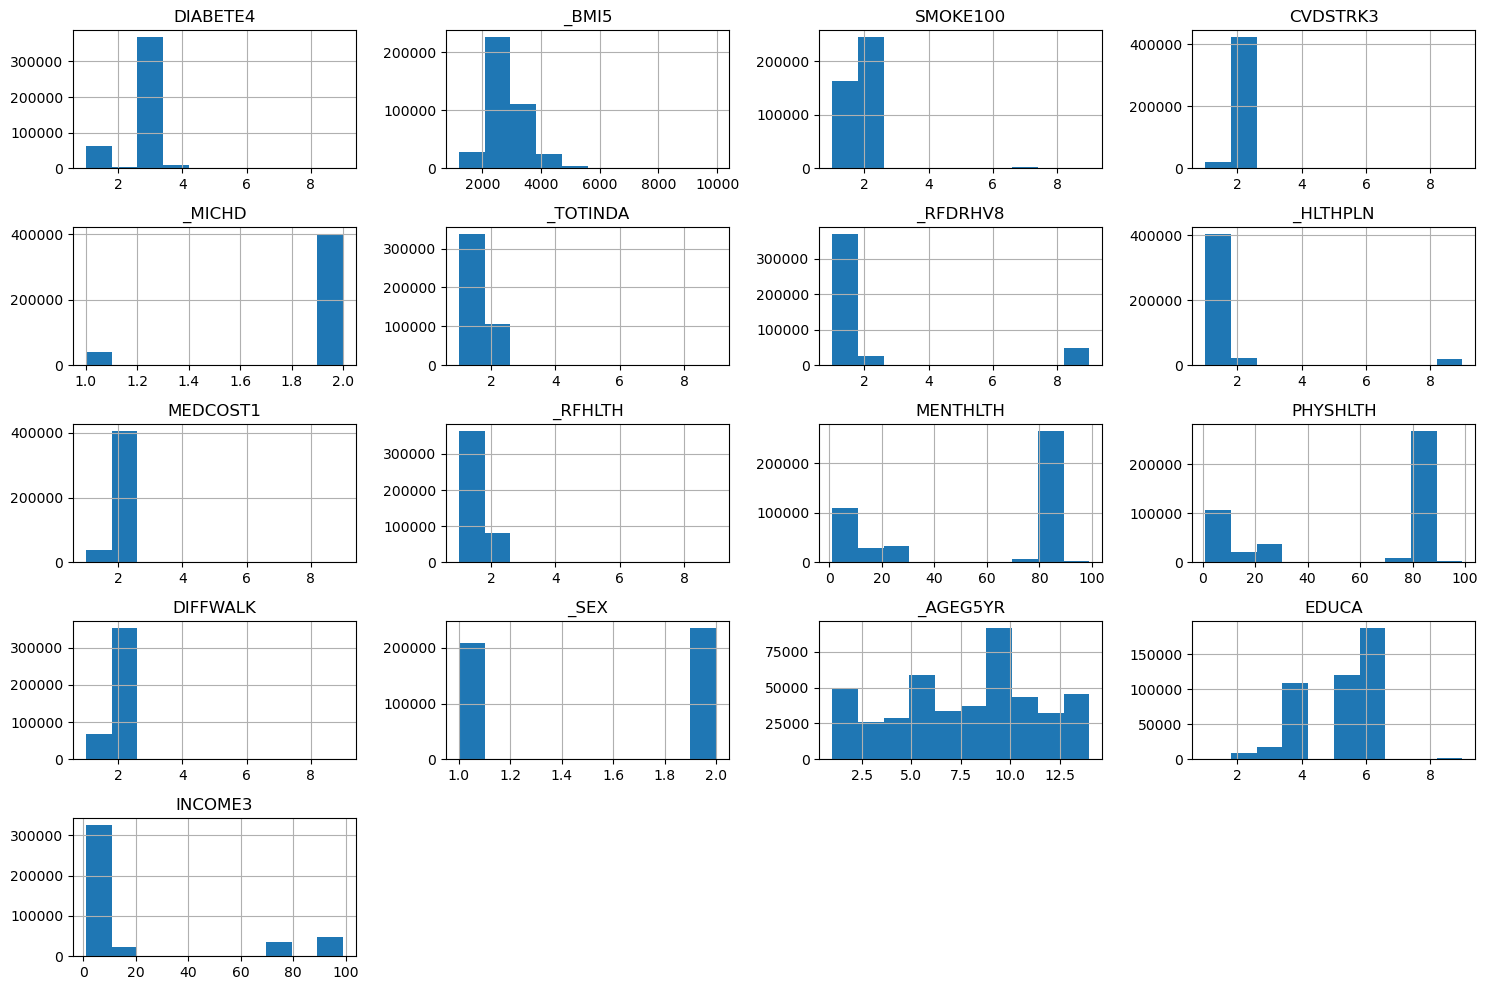

In [ ]:
# Data distribution cho features dạng numeric
df_selected.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

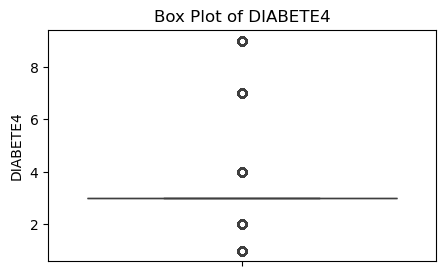

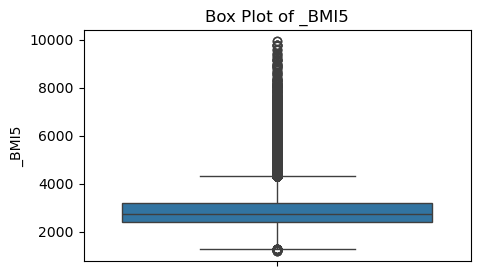

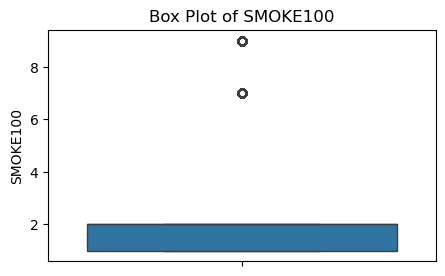

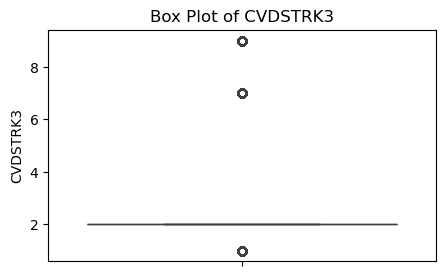

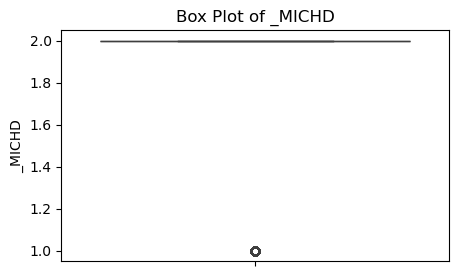

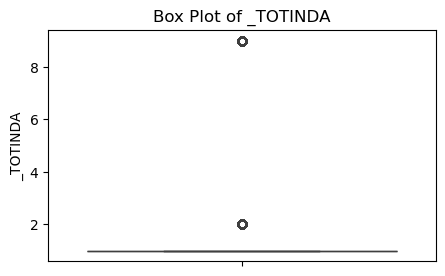

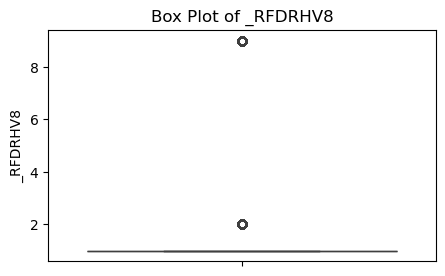

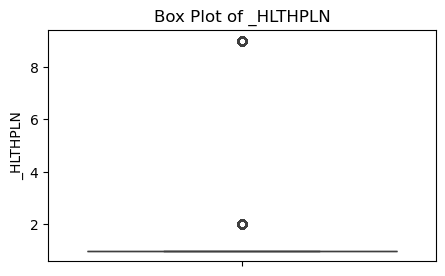

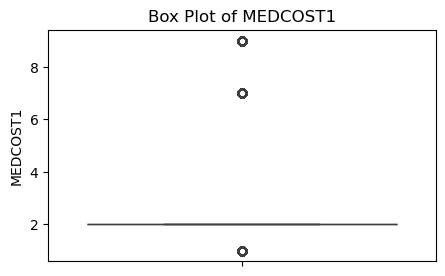

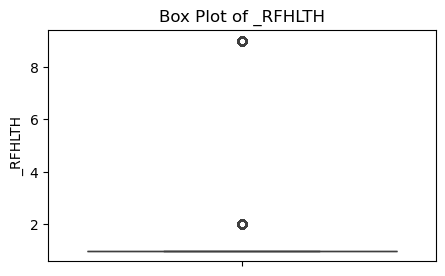

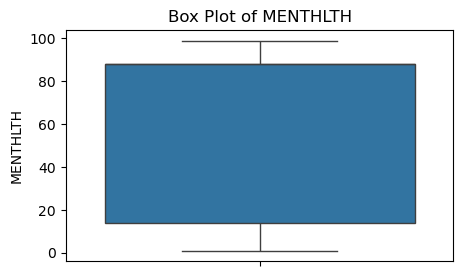

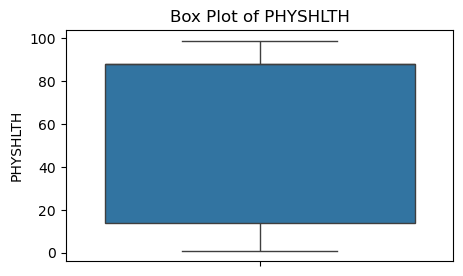

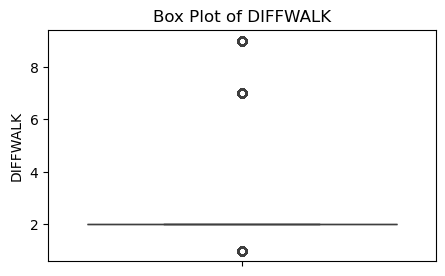

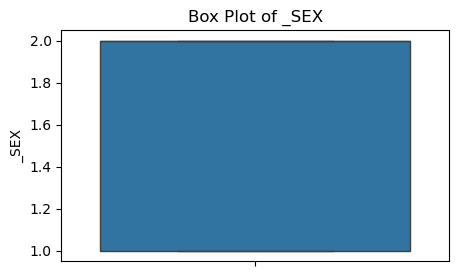

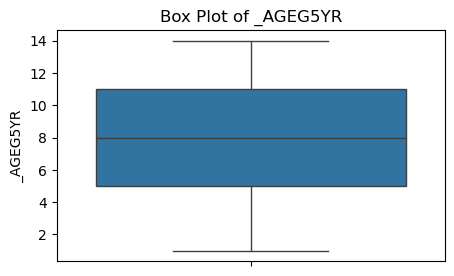

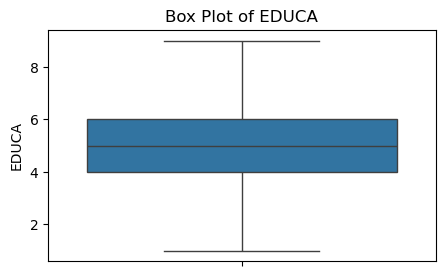

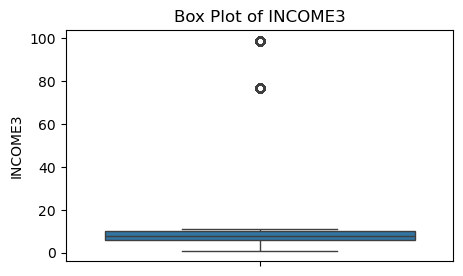

In [ ]:
# Plot box plots cho features dạng numeric
numerical_features = df_selected.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

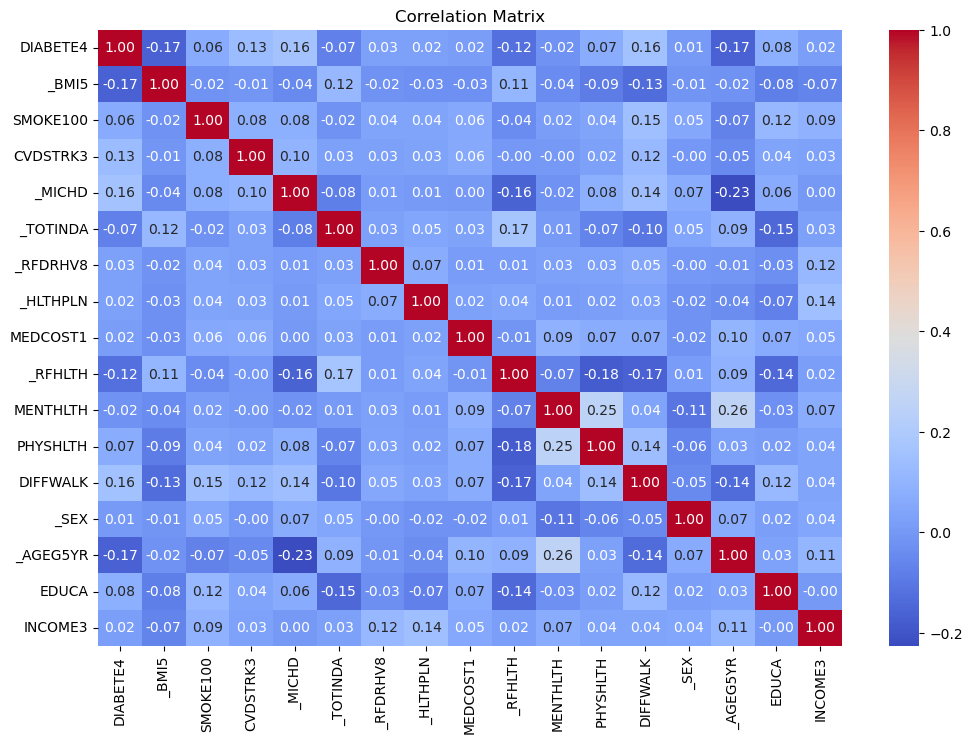

In [ ]:
# Correlation matrix
correlation_matrix = df_selected.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 2. Preprocessing data

**2.1 Drop missing values**

In [ ]:
dfc=df_selected.copy()
#df_selected = dfc.copy()

In [ ]:
df_selected.shape # lúc chưa drop (445132, 17)

(445132, 17)

In [ ]:
df_selected.isnull().sum()

DIABETE4        3
_BMI5       48806
SMOKE100    31777
CVDSTRK3        2
_MICHD       5021
_TOTINDA        0
_RFDRHV8        0
_HLTHPLN        0
MEDCOST1        4
_RFHLTH         0
MENTHLTH        3
PHYSHLTH        5
DIFFWALK    22155
_SEX            0
_AGEG5YR        0
EDUCA           5
INCOME3     12932
dtype: int64

In [ ]:
# df_selected = df_selected.dropna()
# df_selected.shape

**2.2 Drop dontknow/refuse and change relabeling**

In [ ]:
# Check unique and value_counts
for col in df_selected:
    print(f"Column name: {col}")
    print(f"Unique values: {sorted(df_selected[col].unique())}")
    print(f"Value counts:\n{df_selected[col].value_counts().sort_index()}")
    print('----------------------------------------------------------')

Column name: DIABETE4
Unique values: [1.0, 2.0, 3.0, 4.0, 7.0, 9.0, nan]
Value counts:
DIABETE4
1.00     61158
2.00      3836
3.00    368722
4.00     10329
7.00       763
9.00       321
Name: count, dtype: int64
----------------------------------------------------------
Column name: _BMI5
Unique values: [nan, 1202.0, 1205.0, 1206.0, 1211.0, 1215.0, 1216.0, 1219.0, 1220.0, 1221.0, 1224.0, 1227.0, 1230.0, 1231.0, 1233.0, 1234.0, 1236.0, 1239.0, 1240.0, 1244.0, 1248.0, 1250.0, 1255.0, 1262.0, 1269.0, 1275.0, 1277.0, 1278.0, 1281.0, 1283.0, 1284.0, 1285.0, 1286.0, 1287.0, 1288.0, 1291.0, 1292.0, 1294.0, 1297.0, 1298.0, 1299.0, 1300.0, 1302.0, 1304.0, 1306.0, 1308.0, 1310.0, 1311.0, 1312.0, 1316.0, 1317.0, 1319.0, 1323.0, 1324.0, 1325.0, 1328.0, 1329.0, 1331.0, 1334.0, 1335.0, 1338.0, 1339.0, 1341.0, 1343.0, 1346.0, 1347.0, 1348.0, 1351.0, 1352.0, 1353.0, 1356.0, 1360.0, 1363.0, 1364.0, 1366.0, 1367.0, 1368.0, 1372.0, 1373.0, 1375.0, 1376.0, 1378.0, 1379.0, 1381.0, 1382.0, 1383.0, 1384.0, 1

**2.2.1. DIABETE4**

 (Ever told) (you had) diabetes?  (If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant?´.

 If Respondent says pre-diabetes or borderline diabetes, use response code 4.)

In [ ]:
# DIABETE4
# Remove all 7 (dont knows)
# Remove all 9 (refused)
# Change:
# 2 (yes but female pregnancy) = 0 (no)
# 1 (yes true) = 1
# 3 (no true) = 0
# 4 (pre/border) = 1 (yes)
# --> 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes/borderline diabetes or truly diabetes
df_selected['DIABETE4'] = df_selected['DIABETE4'].replace({2:0, 3:0, 4:1})
df_selected = df_selected[df_selected.DIABETE4 != 7]
df_selected = df_selected[df_selected.DIABETE4 != 9]
df_selected = df_selected.dropna(subset=['DIABETE4']) # drop luôn vì chỉ có 3 case
df_selected.DIABETE4.unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2032\329183383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DIABETE4'] = df_selected['DIABETE4'].replace({2:0, 3:0, 4:1})


array([1., 0.])

In [ ]:
df_selected['DIABETE4'].value_counts()

DIABETE4
0.00    372558
1.00     71487
Name: count, dtype: int64

**2.2.2. _BMI5**

Body Mass Index (BMI)

In [ ]:
# How is BMI interpreted for adults?
# According with CDC:
# For adults 20 years old and older, BMI is interpreted using standard weight status categories.
# These categories are the same for men and women of all body types and ages.
# If your BMI is less than 18.5, it falls within the underweight range.
# If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
# If your BMI is 25.0 to 29.9, it falls within the overweight range.
# If your BMI is 30.0 or higher, it falls within the obese range.

In [ ]:
# range: 1 or greater
# Notes: WTKG3/(HTM4*HTM4) (Has 2 implied decimal places) (Weight in kg, height in meter)

In [ ]:
#_BMI5
# chia 100 trước ---> outlier IQR sau ở dưới
df_selected['_BMI5'] = df_selected['_BMI5'].div(100).round(0)
df_selected._BMI5.unique()

array([ nan,  27.,  26.,  23.,  22.,  28.,  29.,  33.,  25.,  32.,  45.,
        24.,  37.,  31.,  39.,  34.,  19.,  21.,  35.,  38.,  20.,  46.,
        13.,  30.,  41.,  36.,  17.,  57.,  47.,  43.,  51.,  18.,  42.,
        44.,  40.,  50.,  52.,  56.,  58.,  16.,  49.,  54.,  15.,  92.,
        60.,  53.,  48.,  59.,  62.,  55.,  61.,  77.,  68.,  14.,  86.,
        63.,  66.,  79.,  64.,  73.,  75.,  69.,  71.,  74.,  12.,  85.,
        95.,  67.,  72.,  65.,  76.,  91.,  89.,  70.,  93.,  98.,  80.,
        81.,  82.,  96.,  99.,  78.,  83.,  88.,  87.,  90.,  84.,  94.,
        97., 100.])

In [ ]:
df_selected['_BMI5'].isnull().sum()

48421

In [ ]:
count_filtered = ((df_selected['DIABETE4'] == 1) & (df_selected['_BMI5'].isnull())).sum()
count_filtered2 = ((df_selected['DIABETE4'] == 0) & (df_selected['_BMI5'].isnull())).sum()
print(f"Số lượng hàng mà DIABETE4 = 1 và _BMI5 là null: {count_filtered}")
print(f"Số lượng hàng mà DIABETE4 = 0 và _BMI5 là null: {count_filtered2}")

Số lượng hàng mà DIABETE4 = 1 và _BMI5 là null: 7221
Số lượng hàng mà DIABETE4 = 0 và _BMI5 là null: 41200


Với tỷ lệ hàng có _BMI5 là null chiếm khoảng 10.9% tổng dữ liệu, có thể xem xét thay thế giá trị bị thiếu thay vì loại bỏ

In [ ]:
bmi_mean = df_selected['_BMI5'].mean()
print(f"Giá trị BMI trung bình: {bmi_mean}")

Giá trị BMI trung bình: 28.512706509210766


In [ ]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
df_selected['_BMI5'] = imputer_mean.fit_transform(df_selected[['_BMI5']])
print(df_selected['_BMI5'].isnull().sum())

0


In [ ]:
import numpy as np
df_selected['_BMI5'] = np.round(df_selected['_BMI5'], 0)

In [ ]:
df_selected.shape # kiểm tra lại

(444045, 17)

**2.2.3. SMOKE100**

Have you smoked at least 100 cigarettes in your entire life?   [Note:  5 packs = 100 cigarettes]

In [ ]:
# SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected['SMOKE100'] = df_selected['SMOKE100'].replace({2:0})
df_selected = df_selected[df_selected.SMOKE100 != 7]
df_selected = df_selected[df_selected.SMOKE100 != 9]
df_selected.SMOKE100.unique()

array([ 0.,  1., nan])

In [ ]:
count_filtered = ((df_selected['DIABETE4'] == 1) & (df_selected['SMOKE100'].isnull())).sum()
count_filtered2 = ((df_selected['DIABETE4'] == 0) & (df_selected['SMOKE100'].isnull())).sum()
print(f"Số lượng hàng mà DIABETE4 = 1 và biến là null: {count_filtered}")
print(f"Số lượng hàng mà DIABETE4 = 0 và biến là null: {count_filtered2}")

Số lượng hàng mà DIABETE4 = 1 và biến là null: 4596
Số lượng hàng mà DIABETE4 = 0 và biến là null: 27063


Thay thế bằng giá trị phổ biến nhất (Mode):

In [ ]:
mode_smoke100 = df_selected['SMOKE100'].mode()[0]
mode_smoke100

0.0

In [ ]:
df_selected['SMOKE100'].fillna(mode_smoke100, inplace=True)
print(df_selected['SMOKE100'].isnull().sum())

0


In [ ]:
df_selected.shape # kiểm tra lại

(441013, 17)

**2.2.4. CVDSTRK3**

 (Ever told) (you had) a stroke.

In [ ]:
# CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df_selected['CVDSTRK3'] = df_selected['CVDSTRK3'].replace({2:0})
df_selected = df_selected[df_selected.CVDSTRK3 != 7]
df_selected = df_selected[df_selected.CVDSTRK3 != 9]
df_selected.CVDSTRK3.unique()

array([0., 1.])

In [ ]:
df_selected.shape # kiểm tra lại

(439756, 17)

**2.2.5. _MICHD**

Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

In [ ]:
# _MICHD
# Change 2 to 0 because this means did not have MI or CHD
df_selected['_MICHD'] = df_selected['_MICHD'].replace({2: 0})
df_selected._MICHD.unique()

array([ 0.,  1., nan])

In [ ]:
count_filtered = ((df_selected['DIABETE4'] == 1) & (df_selected['_MICHD'].isnull())).sum()
count_filtered2 = ((df_selected['DIABETE4'] == 0) & (df_selected['_MICHD'].isnull())).sum()
print(f"Số lượng hàng mà DIABETE4 = 1 và biến là null: {count_filtered}")
print(f"Số lượng hàng mà DIABETE4 = 0 và biến là null: {count_filtered2}")

Số lượng hàng mà DIABETE4 = 1 và biến là null: 1187
Số lượng hàng mà DIABETE4 = 0 và biến là null: 3166


In [ ]:
mode_michd = df_selected['_MICHD'].mode()[0]
mode_michd

0.0

In [ ]:
df_selected['_MICHD'].fillna(mode_michd, inplace=True)
print(df_selected['SMOKE100'].isnull().sum())

0


In [ ]:
df_selected.shape # kiểm tra lại

(439756, 17)

**2.2.6. _TOTINDA**

Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

In [ ]:
# _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
df_selected['_TOTINDA'] = df_selected['_TOTINDA'].replace({2:0})
df_selected = df_selected[df_selected._TOTINDA != 9]
df_selected._TOTINDA.unique()

array([0., 1.])

**2.2.7. _RFDRHV8**

Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

In [ ]:
# _RFDRHV8
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
df_selected.loc[:, '_RFDRHV8'] = df_selected['_RFDRHV8'].replace({1: 0, 2: 1})
df_selected = df_selected.loc[df_selected['_RFDRHV8'] != 9]
df_selected._RFDRHV8.unique()

array([0., 1.])

**2.2.8. _HLTHPLN**

 Adults who had some form of health insurance

In [ ]:
# _HLTHPLN
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
df_selected['_HLTHPLN'] = df_selected['_HLTHPLN'].replace({2:0})
df_selected = df_selected[df_selected._HLTHPLN != 7]
df_selected = df_selected[df_selected._HLTHPLN != 9]
df_selected._HLTHPLN.unique()

array([1., 0.])

**2.2.9. MEDCOST1**

Was there a time in the past 12 months when you needed to see a doctor but could not because you could not afford it?

In [ ]:
# MEDCOST1
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
df_selected['MEDCOST1'] = df_selected['MEDCOST1'].replace({2:0})
df_selected = df_selected[df_selected.MEDCOST1 != 7]
df_selected = df_selected[df_selected.MEDCOST1 != 9]
df_selected.MEDCOST1.unique()

array([ 0.,  1., nan])

In [ ]:
df_selected['MEDCOST1'].isnull().sum()

2

In [ ]:
df_selected = df_selected.dropna(subset=['MEDCOST1']) # drop luôn vì chỉ có 2-4 case

**2.2.10. _RFHLTH**

Adults with good or better health

In [ ]:
# 1 = Excellent
# 2 = very good
# 3 = good
# 4 = fair
# 5 = poor

In [ ]:
# _RFHLTH
# 1 is Excellent -> 5 is Poor
# Remove 7 and 9 for don't know and refused
df_selected = df_selected[df_selected._RFHLTH != 7]
df_selected = df_selected[df_selected._RFHLTH != 9]
df_selected._RFHLTH.unique()

array([1., 2.])

**2.2.11. MENTHLTH**

 Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

In [ ]:
# MENTHLTH
# 0-30 days of month
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df_selected['MENTHLTH'] = df_selected['MENTHLTH'].replace({88:0})
df_selected = df_selected[df_selected.MENTHLTH != 77]
df_selected = df_selected[df_selected.MENTHLTH != 99]
df_selected.MENTHLTH.unique()

array([ 0.,  3.,  9.,  5., 15., 20., 14., 10., 18.,  1.,  2., 30.,  4.,
        6.,  7., 25.,  8., 27., 21., 12., 16., 13., 28., 29., 26., 17.,
       11., 23., 19., 22., 24., nan])

In [ ]:
df_selected['MENTHLTH'].isnull().sum()

1

In [ ]:
df_selected = df_selected.dropna(subset=['MENTHLTH']) # drop luôn vì chỉ có 1 case

**2.2.12. PHYSHLTH**

During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?

In [ ]:
# PHYSHLTH
# 0-30 days of month
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df_selected['PHYSHLTH'] = df_selected['PHYSHLTH'].replace({88:0})
df_selected = df_selected[df_selected.PHYSHLTH != 77]
df_selected = df_selected[df_selected.PHYSHLTH != 99]
df_selected.PHYSHLTH.unique()

array([ 0.,  2.,  1.,  8.,  5., 30.,  4., 23., 14., 15.,  3., 10.,  7.,
       25.,  6., 21., 20., 29., 16.,  9., 27., 28., 12., 13., 11., 26.,
       17., 24., 18., 19., 22., nan])

In [ ]:
df_selected['PHYSHLTH'].isnull().sum()

3

In [ ]:
df_selected = df_selected.dropna(subset=['PHYSHLTH']) # drop luôn vì chỉ có 3 case

**2.2.13. DIFFWALK**

 Do you have serious difficulty walking or climbing stairs?

In [ ]:
# DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
df_selected['DIFFWALK'] = df_selected['DIFFWALK'].replace({2:0})
df_selected = df_selected[df_selected.DIFFWALK != 7]
df_selected = df_selected[df_selected.DIFFWALK != 9]
df_selected.DIFFWALK.unique()

array([0., 1.])

**2.2.14. _SEX**

In [ ]:
# _SEX
# men are at higher risk for heart disease
# change 2 to 0 (female as 0). Male is 1
df_selected['_SEX'] = df_selected['_SEX'].replace({2:0})
df_selected._SEX.unique()

array([0., 1.])

**2.2.15. _AGEG5YR**

Fourteen-level age category

In [ ]:
# 1 = 18-24 years old
# 2 = 25-29 years old
# 3 = 30-34 years old
# 4 = 35-39 years old
# 5 = 40-44 years old
# 6 = 45-49 years old
# 7 = 50-54 years old
# 8 = 55-59 years old
# 9 = 60-64 years old
# 10 = 65-69 years old
# 11 = 70-74 years old
# 12 = 75-79 years old
# 13 = 80 years and older

In [ ]:
# _AGEG5YR
# 1 is 18-24 yearsold, 13 is 80 years and older. (5 years increments)
# remove 14 because it is don't know or missing
df_selected = df_selected[df_selected._AGEG5YR != 14]
df_selected._AGEG5YR.unique()

array([13.,  8.,  5., 12., 11., 10.,  9.,  7.,  6.,  4.,  3.,  2.,  1.])

**2.2.16. EDUCA**

What is the highest grade or year of school you completed?

In [ ]:
# 1 = Never attended school or only kindergarten
# 2 = Grades 1 through 8 (Elementary)
# 3 = Grades 9 through 11 (Some high school)
# 4 = Grade 12 or GED (High school graduate)
# 5 = College 1 year to 3 years (Some college or technical school)
# 6 = College 4 years or more (College graduate)

In [ ]:
# EDUCA
# 1 being never attended school or kindergarten, 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
df_selected = df_selected[df_selected.EDUCA != 9]
df_selected.EDUCA.unique()

array([4., 6., 5., 3., 2., 1.])

**2.2.17. INCOME3**

 Is your annual household income from all sources:  (If respondent refuses at any income level, code ´Refused.´)

In [ ]:
# 1 = <10,000
# 2 = 10,000–15,000
# 3 = 15,000–20,000
# 4 = 20,000–25,000
# 5 = 25,000–35,000
# 6 = 35,000–50,000
# 7 = 50,001–75,000
# 8 = >75,000

In [ ]:
# INCOME3
# 1 being less than $10,000
# 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
df_selected = df_selected[df_selected.INCOME3 != 77]
df_selected = df_selected[df_selected.INCOME3 != 99]
df_selected.INCOME3.unique()

array([ 5., 10.,  8.,  7.,  9.,  6.,  2.,  4.,  3.,  1., 11., nan])

In [ ]:
df_selected['INCOME3'].isnull().sum()

4

In [ ]:
df_selected = df_selected.dropna(subset=['INCOME3']) # drop luôn vì chỉ có 4 case

In [ ]:
#Kiểm tra lại
print(df_selected['DIABETE4'].value_counts())
print(df_selected.shape)

DIABETE4
0.00    253303
1.00     48116
Name: count, dtype: int64
(301419, 17)


**2.3 Rename columns**

In [ ]:
df_selected = df_selected.rename(columns = {'DIABETE4':'Diabetes',
                                         '_BMI5':'BMI',
                                         'SMOKE100':'Smoker',
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDisease',
                                         '_TOTINDA':'PhysicalActivity',
                                         '_RFDRHV8':'Drinker',
                                         '_HLTHPLN':'Healthcare', 'MEDCOST1':'CannotaffordDoctor',
                                         '_RFHLTH':'GeneralHealth', 'MENTHLTH':'MentalHealth', 'PHYSHLTH':'PhysicalHealth', 'DIFFWALK':'DiffWalk',
                                         '_SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME3':'Income' })

In [ ]:
dfc2=df_selected.copy()

In [ ]:
dfc2.shape

(301419, 17)

**2.4 Remove outlier of BMI**

In [ ]:
# Xử lý outlier BMI
#  BMI theo phân loại quốc tế (WHO) thì dưới 18,5 là nhẹ cân, 18,5-24,9 là bình thường, 25-29,9 là thừa cân và từ 30 trở lên là béo phì
# Q1 = df_selected['BMI'].quantile(0.25)
# Q3 = df_selected['BMI'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# step = IQR / 10

# upper_limit_8th_part = Q1 + 8 * step

# df_selected = df_selected[df_selected['BMI'] <= upper_limit_8th_part]

In [ ]:
Q1 = df_selected['BMI'].quantile(0.25)
Q3 = df_selected['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

step = IQR / 10

upper_limit_9th_part = Q1 + 9 * step

df_selected = df_selected[df_selected['BMI'] <= upper_limit_9th_part]

In [ ]:
dfc3 = df_selected.copy()

In [ ]:
dfc3.shape

(223287, 17)

**2.5 Remove duplicated?**

In [ ]:
df_selected.duplicated().sum()

59426

In [ ]:
# df_selected.drop_duplicates(inplace = True)

**Recheck**

In [ ]:
dfc3.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes,"223,287.00",0.12,0.33,0.00,0.00,0.00,0.00,1.00
BMI,"223,287.00",25.82,3.37,12.00,23.00,26.00,29.00,31.00
Smoker,"223,287.00",0.40,0.49,0.00,0.00,0.00,1.00,1.00
Stroke,"223,287.00",0.04,0.19,0.00,0.00,0.00,0.00,1.00
HeartDisease,"223,287.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
PhysicalActivity,"223,287.00",0.81,0.39,0.00,1.00,1.00,1.00,1.00
Drinker,"223,287.00",0.08,0.26,0.00,0.00,0.00,0.00,1.00
Healthcare,"223,287.00",0.95,0.22,0.00,1.00,1.00,1.00,1.00
CannotaffordDoctor,"223,287.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
GeneralHealth,"223,287.00",1.14,0.34,1.00,1.00,1.00,1.00,2.00


In [ ]:
#Kiểm tra lại
print(df_selected['Diabetes'].value_counts())
print(df_selected.shape)

Diabetes
0.00    196087
1.00     27200
Name: count, dtype: int64
(223287, 17)


In [ ]:
for col in df_selected:
    print(f"Column name: {col}")
    print(f"Unique values: {sorted(df_selected[col].unique())}")
    print(f"Value counts:\n{df_selected[col].value_counts().sort_index()}")
    print('----------------------------------------------------------')

Column name: Diabetes
Unique values: [0.0, 1.0]
Value counts:
Diabetes
0.00    196087
1.00     27200
Name: count, dtype: int64
----------------------------------------------------------
Column name: BMI
Unique values: [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0]
Value counts:
BMI
12.00       15
13.00       43
14.00       92
15.00      210
16.00      513
17.00     1020
18.00     2287
19.00     4408
20.00     6980
21.00    10501
22.00    14458
23.00    16533
24.00    21112
25.00    18196
26.00    21720
27.00    26235
28.00    18321
29.00    29484
30.00    16688
31.00    14471
Name: count, dtype: int64
----------------------------------------------------------
Column name: Smoker
Unique values: [0.0, 1.0]
Value counts:
Smoker
0.00    134062
1.00     89225
Name: count, dtype: int64
----------------------------------------------------------
Column name: Stroke
Unique values: [0.0, 1.0]
Value counts:
Stroke
0.00    2

In [ ]:
df_selected.head()

,Diabetes,BMI,Smoker,Stroke,HeartDisease,PhysicalActivity,Drinker,Healthcare,CannotaffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,DiffWalk,Sex,Age,Education,Income
1,0.00,27.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,13.00,4.00,5.00
2,0.00,26.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,3.00,2.00,0.00,0.00,8.00,6.00,10.00
4,0.00,22.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,2.00,0.00,0.00,5.00,5.00,5.00
6,0.00,23.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,13.00,6.00,8.00
7,0.00,28.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,13.00,4.00,7.00


In [ ]:
#************************************************************************************************
# df_selected.to_csv('data_processed3.csv', sep=",", index=False)

In [ ]:
target = 'Diabetes'
bool_vars = (df_selected.nunique()[df_selected.nunique() == 2]  # boolean variables: 0/1
                .index
                .drop(labels=['Diabetes', 'GeneralHealth']))
num_vars = [var for var in df_selected.columns if var not in bool_vars and var != 'Diabetes']

Để loại bỏ các biến có mức độ tương quan cao với nhau.
Khi hai biến có tương quan cao, chúng mang thông tin tương tự, và giữ cả hai có thể gây ra hiện tượng đa cộng tuyến (multicollinearity),
làm giảm hiệu quả của mô hình.


In [ ]:
# pear_coor = (df_selected.drop('Diabetes', axis=1)
#    .corrwith(df_selected.Diabetes)
#    .abs()
#    .sort_values(ascending=False))
# pear_coor

In [ ]:
# pear_coor[pear_coor>0.05]

Để kiểm tra sự phụ thuộc giữa các biến độc lập và biến phụ thuộc (đặc biệt là cho biến danh định).
Giúp xác định các biến có mối quan hệ mạnh với biến mục tiêu.

In [ ]:
# pip install scipy

In [ ]:
# from scipy.stats import chi2_contingency

In [ ]:
# df_X = df_selected.drop('Diabetes', axis=1)
# df_y = df_selected['Diabetes']

In [ ]:
# # Chi² 2-sample Test
# chi2_results = []
# for column in df_X.columns:
#     contingency_table = pd.crosstab(df_X[column], df_y)
#     chi2, p, dof, expected = chi2_contingency(contingency_table)
#     chi2_results.append((column, chi2, p))

# chi2_df = pd.DataFrame(chi2_results, columns=['Variable', 'ChiSq_Score', 'ChiSq_pValue'])

# sorted_chi2_df = chi2_df.sort_values(by='ChiSq_Score', ascending=False)

# print(sorted_chi2_df)

Những biến có giá trị chi-square cao và p-value rất thấp (Age, GeneralHealth, HeartDisease, DiffWalk, BMI, etc.)
là những yếu tố có mối liên hệ mạnh mẽ với tình trạng tiểu đường và nên được xem xét kỹ trong quá trình xây dựng mô hình chẩn đoán.

Các yếu tố khác như PhysicalHealth, MentalHealth, Income, Stroke, PhysicalActivity, và Drinker cũng có mối quan hệ đáng kể
nhưng yếu hơn so với những yếu tố hàng đầu.

Mutual Information is other form to see the information gain of each feature.

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# mut_info = mutual_info_classif(df_X, df_y)
# mut_df = pd.DataFrame(mut_info, columns=['Mutual_info'], index=df_X.columns)
# mut_df.sort_values(by='Mutual_info', ascending=False, inplace=True)

# print(mut_df)

Mutual Information (Thông tin tương hỗ) là một thước đo về mức độ phụ thuộc lẫn nhau giữa hai biến.
Nó cho biết lượng thông tin về biến phụ thuộc (ở đây là tiểu đường) có thể được giải thích bởi biến đầu vào.

Các biến như Age (Tuổi), Healthcare (Chăm sóc sức khỏe), GeneralHealth (Tình trạng sức khỏe tổng quát), và PhysicalActivity (Hoạt động thể chất) có mức độ phụ thuộc lẫn nhau lớn hơn với tiểu đường. Những biến này có thể cung cấp nhiều thông tin hữu ích trong mô hình dự đoán tiểu đường.
Các biến khác như Stroke (Đột quỵ) và CannotaffordDoctor (Không thể chi trả bác sĩ) có giá trị Mutual Information rất thấp hoặc bằng 0, cho thấy chúng có ít hoặc không có mức độ phụ thuộc lẫn nhau với tiểu đường và có thể ít quan trọng hơn trong mô hình dự đoán.

In [ ]:
# high_chi2_features = sorted_chi2_df[sorted_chi2_df['ChiSq_Score'] > 250]['Variable'].to_list()

# high_chi2_features

In [ ]:
# dfc4 = df_selected.copy()
# #df_selected = dfc4.copy()

In [ ]:
# Less than 0.02 Not useful for prediction
# 0.02 to 0.1 Weak predictive Power
# 0.1 to 0.3 Medium predictive Power
# 0.3 to 0.5 Strong predictive Power
# 0.5 and higher Suspicious Predictive Power

In [ ]:
# def iv_woe(data, target, bins=10, show_woe=False):

#     #Empty Dataframe
#     newDF,woeDF = pd.DataFrame(), pd.DataFrame()

#     #Extract Column Names
#     cols = data.columns

#     #Run WOE and IV on all the independent variables
#     for ivars in cols[~cols.isin([target])]:
#         if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
#             binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
#             d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
#         else:
#             d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
#         d0 = d0.astype({"x": str})
#         d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
#         d.columns = ['Cutoff', 'N', 'Events']
#         d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
#         d['Non-Events'] = d['N'] - d['Events']
#         d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
#         d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
#         d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
#         d.insert(loc=0, column='Variable', value=ivars)
#         print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
#         temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
#         newDF=pd.concat([newDF,temp], axis=0)
#         woeDF=pd.concat([woeDF,d], axis=0)

#         #Show WOE Table
#         if show_woe == True:
#             print(d)
#     return newDF, woeDF

In [ ]:
# iv,woe = iv_woe(df_selected, 'Diabetes')
# iv.sort_values(by='IV', ascending=False)

In [ ]:
# columns_to_keep = ['Diabetes','Age', 'GeneralHealth', 'HeartDisease', 'DiffWalk', 'BMI',
#                    'PhysicalHealth', 'MentalHealth', 'Income', 'Stroke',
#                    'PhysicalActivity', 'Drinker', 'Education', 'Healthcare', 'Sex']
# columns_to_keep = ['Diabetes','Age',
#  'GeneralHealth',
#  'DiffWalk',
#  'HeartDisease',
#  'BMI',
#  'PhysicalHealth',
#  'Income',
#  'PhysicalActivity',
#  'Stroke',
#  'Education',
#  'Smoker',
#  'MentalHealth',
#  'Drinker',
#  'Healthcare']
# df_selected = df_selected[columns_to_keep]

# df_selected.shape

In [ ]:
# df_selected.head()

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# features = df_selected.columns.tolist()
# features.remove('Diabetes')  # Loại bỏ biến mục tiêu nếu nó nằm trong danh sách
# X2 = df_selected[features]

# def calculate_vif(X):
#     vif = pd.DataFrame()
#     vif['Variable'] = X.columns
#     vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif

# print("VIF trước khi loại bỏ các biến có multicollinearity cao:")
# print(calculate_vif(X2))

In [ ]:
#  Variable   VIF
# 0                  BMI 31.13
# 1               Smoker  1.95
# 2               Stroke  1.13
# 3         HeartDisease  1.28
# 4     PhysicalActivity  4.60
# 5              Drinker  1.14
# 6           Healthcare 16.61
# 7   CannotaffordDoctor  1.25
# 8        GeneralHealth 13.43
# 9         MentalHealth  1.60
# 10      PhysicalHealth  1.89
# 11            DiffWalk  1.63
# 12                 Sex  2.05
# 13                 Age  6.81
# 14           Education 27.65
# 15              Income 10.86

In [ ]:
# def remove_high_vif(X, threshold=5.0):
#     while True:
#         vif = calculate_vif(X)
#         max_vif = vif['VIF'].max()
#         if max_vif > threshold:
#             feature_to_remove = vif[vif['VIF'] == max_vif]['Variable'].values[0]
#             print(f"Loại bỏ biến '{feature_to_remove}' có VIF = {max_vif}")
#             X = X.drop(columns=[feature_to_remove])
#         else:
#             break
#     return X

In [ ]:
# X2_reduced = remove_high_vif(X2)
# print("VIF sau khi loại bỏ các biến có multicollinearity cao:")
# print(calculate_vif(X2_reduced))

In [ ]:
# X2_final = X2_reduced
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2_final, df_selected['Diabetes'], test_size=0.3, random_state=42)

In [ ]:
# smote = SMOTE(random_state=42)
# X2_train_sm, y2_train_sm = smote.fit_resample(X2_train, y2_train)

# scaler = StandardScaler()
# X2_train_sm = scaler.fit_transform(X2_train_sm)
# X2_test_scaled = scaler.transform(X2_test)

# # Logistic Regression
# clf_lr = LogisticRegression()
# clf_lr.fit(X2_train_sm, y2_train_sm)
# y2_pred_lr = clf_lr.predict(X2_test_scaled)
# print("Logistic Regression Results")
# print(classification_report(y2_test, y2_pred_lr))

# # Random Forest
# clf_rf = RandomForestClassifier()
# clf_rf.fit(X2_train_sm, y2_train_sm)
# y2_pred_rf = clf_rf.predict(X2_test_scaled)
# print("Random Forest Results")
# print(classification_report(y2_test, y2_pred_rf))

In [ ]:
# cm_lr = confusion_matrix(y2_test, y2_pred_lr)
# cm_lr_percent = cm_lr / cm_lr.sum(axis=1)[:, np.newaxis] * 100
# print("Confusion Matrix for Logistic Regression:")
# print(cm_lr)


# plt.figure(figsize=(4, 4))
# sns.heatmap(cm_lr_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.title('Confusion Matrix for Logistic Regression (Percent)')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()


# cm_rf = confusion_matrix(y2_test, y2_pred_rf)
# cm_rf_percent = cm_rf / cm_rf.sum(axis=1)[:, np.newaxis] * 100
# print("Confusion Matrix for Random Forest:")
# print(cm_rf)


# plt.figure(figsize=(4, 4))
# sns.heatmap(cm_rf_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.title('Confusion Matrix for Random Forest (Percent)')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

## 3. Analyze: Build hypothesis

**3.1 Univariate**

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223287 entries, 1 to 445128
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Diabetes            223287 non-null  float64
 1   BMI                 223287 non-null  float64
 2   Smoker              223287 non-null  float64
 3   Stroke              223287 non-null  float64
 4   HeartDisease        223287 non-null  float64
 5   PhysicalActivity    223287 non-null  float64
 6   Drinker             223287 non-null  float64
 7   Healthcare          223287 non-null  float64
 8   CannotaffordDoctor  223287 non-null  float64
 9   GeneralHealth       223287 non-null  float64
 10  MentalHealth        223287 non-null  float64
 11  PhysicalHealth      223287 non-null  float64
 12  DiffWalk            223287 non-null  float64
 13  Sex                 223287 non-null  float64
 14  Age                 223287 non-null  float64
 15  Education           223287 non-null  fl

In [ ]:
df_selected.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes,"223,287.00",0.12,0.33,0.00,0.00,0.00,0.00,1.00
BMI,"223,287.00",25.82,3.37,12.00,23.00,26.00,29.00,31.00
Smoker,"223,287.00",0.40,0.49,0.00,0.00,0.00,1.00,1.00
Stroke,"223,287.00",0.04,0.19,0.00,0.00,0.00,0.00,1.00
HeartDisease,"223,287.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
PhysicalActivity,"223,287.00",0.81,0.39,0.00,1.00,1.00,1.00,1.00
Drinker,"223,287.00",0.08,0.26,0.00,0.00,0.00,0.00,1.00
Healthcare,"223,287.00",0.95,0.22,0.00,1.00,1.00,1.00,1.00
CannotaffordDoctor,"223,287.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
GeneralHealth,"223,287.00",1.14,0.34,1.00,1.00,1.00,1.00,2.00


In [ ]:
target = 'Diabetes'
bool_vars = (df_selected.nunique()[df_selected.nunique() == 2]  # boolean variables: 0/1
                .index
                .drop(labels=['Diabetes', 'GeneralHealth']))
num_vars = [var for var in df_selected.columns if var not in bool_vars and var != 'Diabetes']

Diabetes
1.00     27200
0.00    196087
Name: count, dtype: int64
Diabetes
1.00    12.18%
0.00    87.82%
Name: proportion, dtype: object


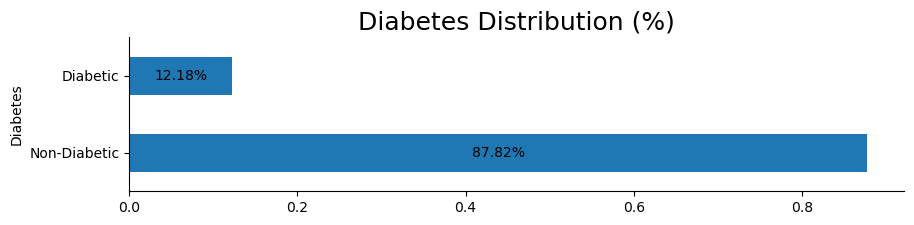

In [ ]:
diabetes_counts = df_selected['Diabetes'].value_counts(ascending=True)
diabetes_percentages = df_selected['Diabetes'].value_counts(1, ascending=True).apply(lambda x: format(x, '.2%'))

print(diabetes_counts)
print(diabetes_percentages)

ax = df_selected['Diabetes'].value_counts(1).plot(kind='barh', figsize=(10, 2))
ax.spines[['top', 'right']].set_visible(False)
plt.title('Diabetes Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])

for container in ax.containers:
    labels = [f'{v.get_width()*100:.2f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()

**3.2 Bivariate Analysis**
cho Diabetes

In [ ]:
# print(df_selected['Diabetes'].value_counts(ascending=True))
# print(df_selected['Diabetes'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
# print()
# df_selected['Diabetes'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
# plt.title('Diabetes Distribution (%)', fontsize=18)
# plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [ ]:
# colors = ['#be4d25','#2596be']
# def analyse_cat(var):
#     (df_selected.groupby('Diabetes')[var]
#      .value_counts(1)
#      .unstack()
#      .iloc[:,::-1]
#      .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
#      .spines[['top', 'right']].set_visible(False))
#     plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
#     plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
#     plt.tight_layout()
#     plt.title(var, fontsize=18)
#     plt.show()

# for var in bool_vars:
#     analyse_cat(var)

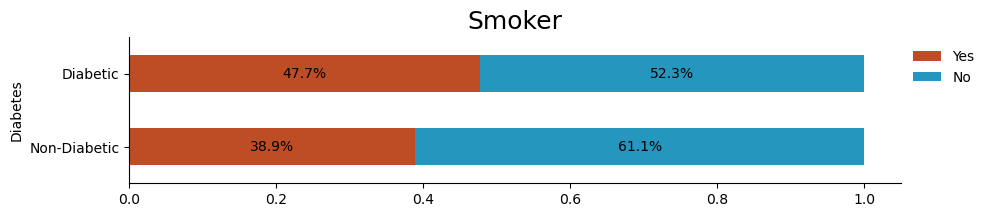

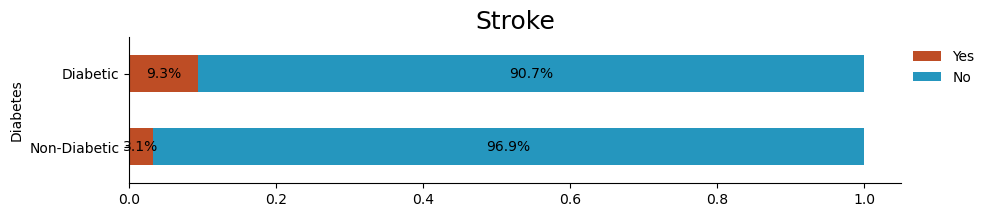

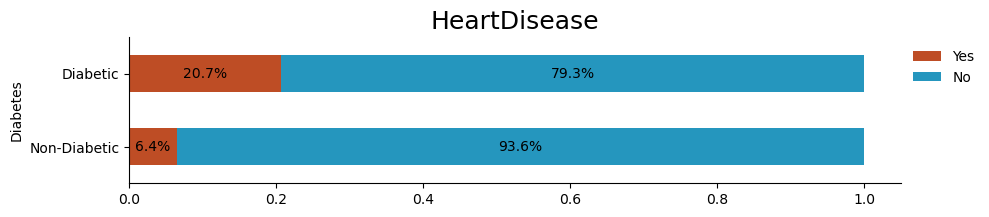

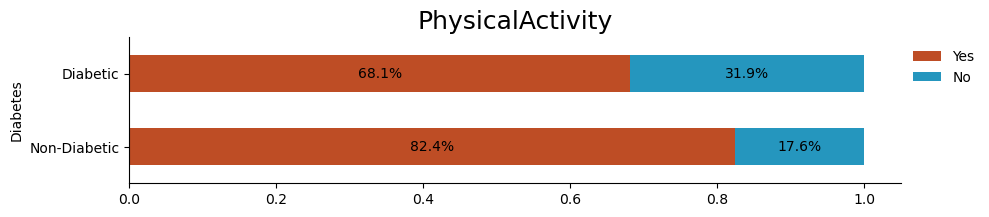

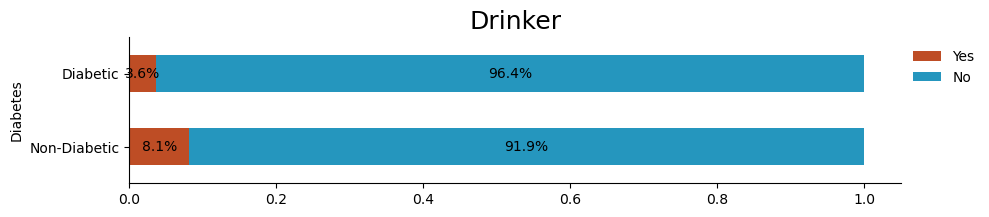

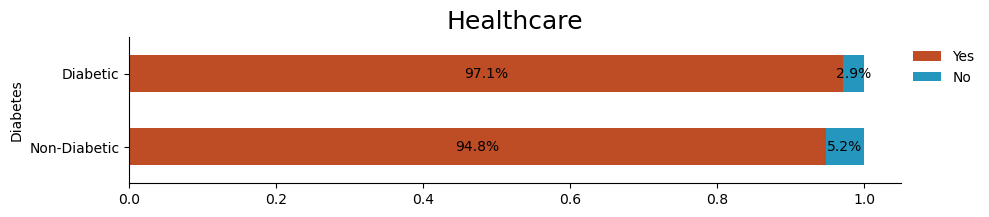

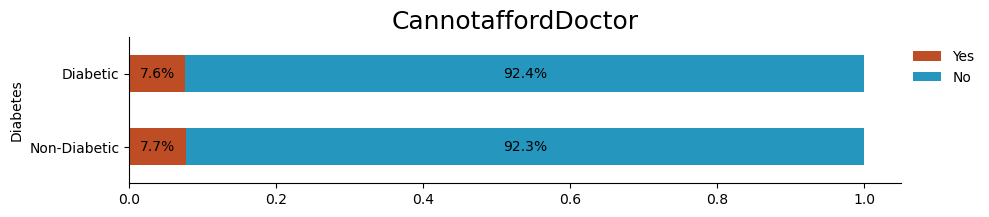

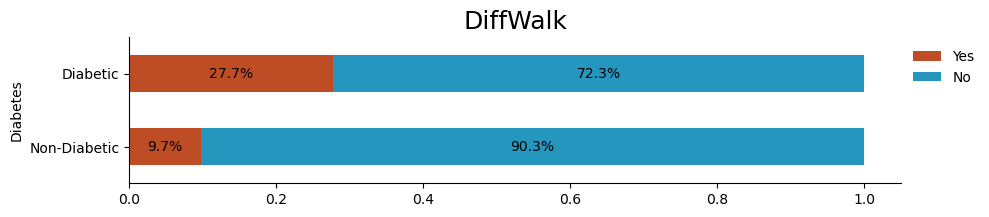

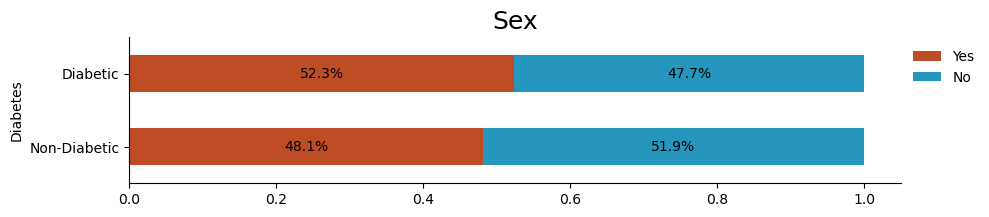

In [ ]:
colors = ['#be4d25','#2596be']

def analyse_cat(var):
    ax = (df_selected.groupby('Diabetes')[var]
          .value_counts(normalize=True)
          .unstack()
          .iloc[:,::-1]
          .plot(kind='barh', stacked=True, figsize=(10, 2), color=colors, alpha=1))

    ax.spines[['top', 'right']].set_visible(False)
    plt.legend(['Yes', "No"], bbox_to_anchor=(1, 1, 0, 0), shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])

    for container in ax.containers:
        labels = [f'{v.get_width()*100:.1f}%' for v in container]
        ax.bar_label(container, labels=labels, label_type='center')

    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

# Plotting the binary variables
for feature in bool_vars:
    analyse_cat(feature)

In [ ]:
# Note:
# In variable Sex, yes = Male, No = Female

ValueError: num must be an integer with 1 <= num <= 6, not 7

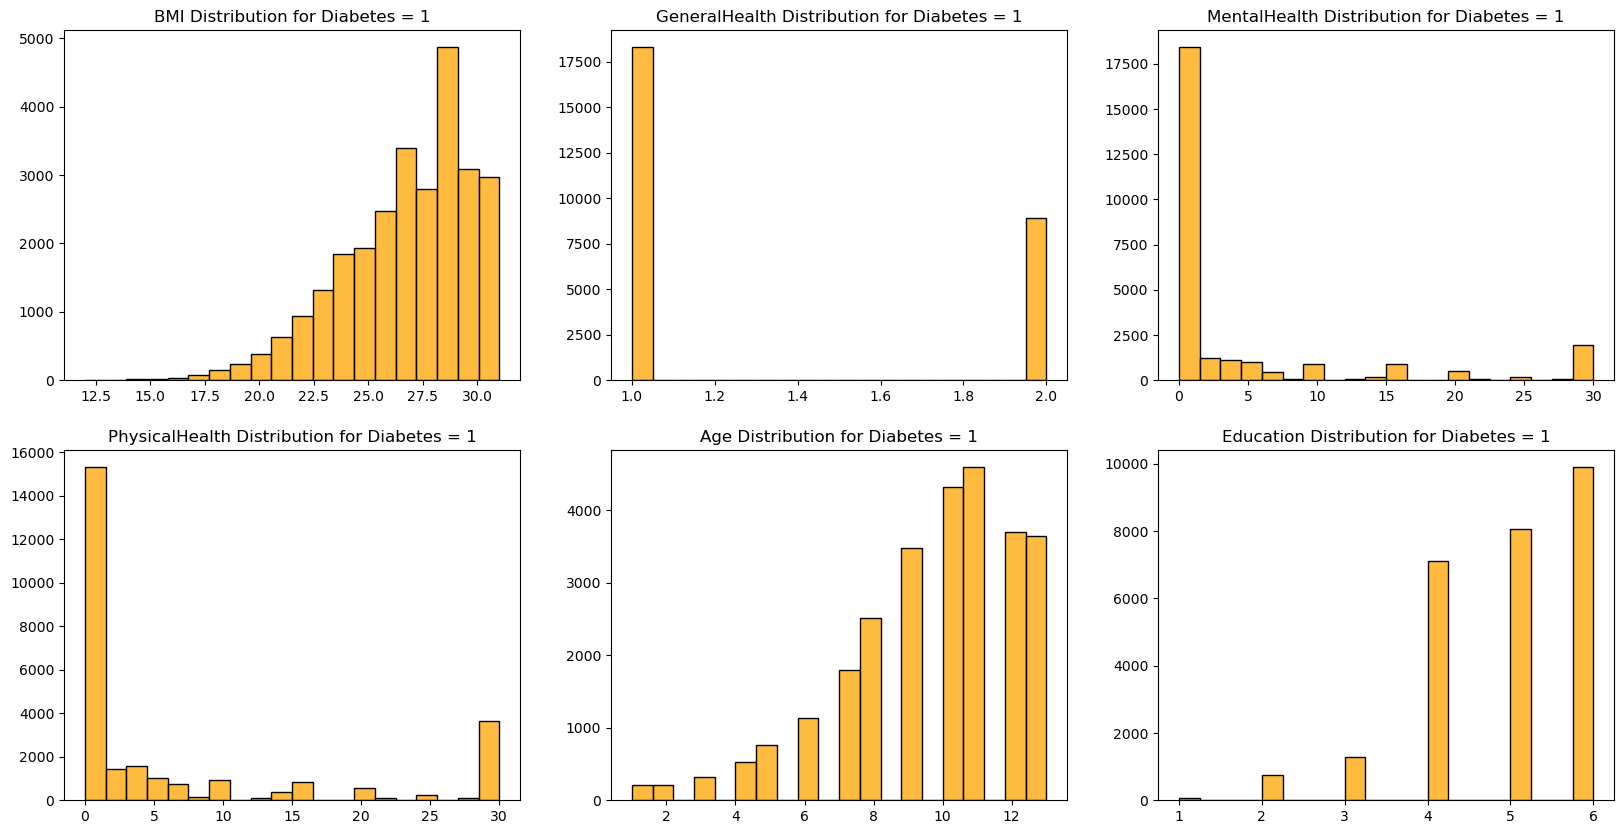

In [ ]:
diabetes_positive = df_selected[df_selected['Diabetes'] == 1]

plt.figure(figsize=(20, 10))

for i, feature in enumerate(num_vars):
    plt.subplot(2, 3, i+1)
    sns.histplot(diabetes_positive[feature], kde=False, color='orange', bins=20) #label=feature,
    plt.title(f'{feature} Distribution for Diabetes = 1')
    #plt.legend(title='Diabetes')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# df_selected[num_vars].hist(figsize=(12,12))

In [ ]:
# num_cols = df_selected.columns
# for col in num_cols:
#   sns.histplot(x = col, data = df_selected, kde = True)
#   plt.show()

**3.3 Correlation**

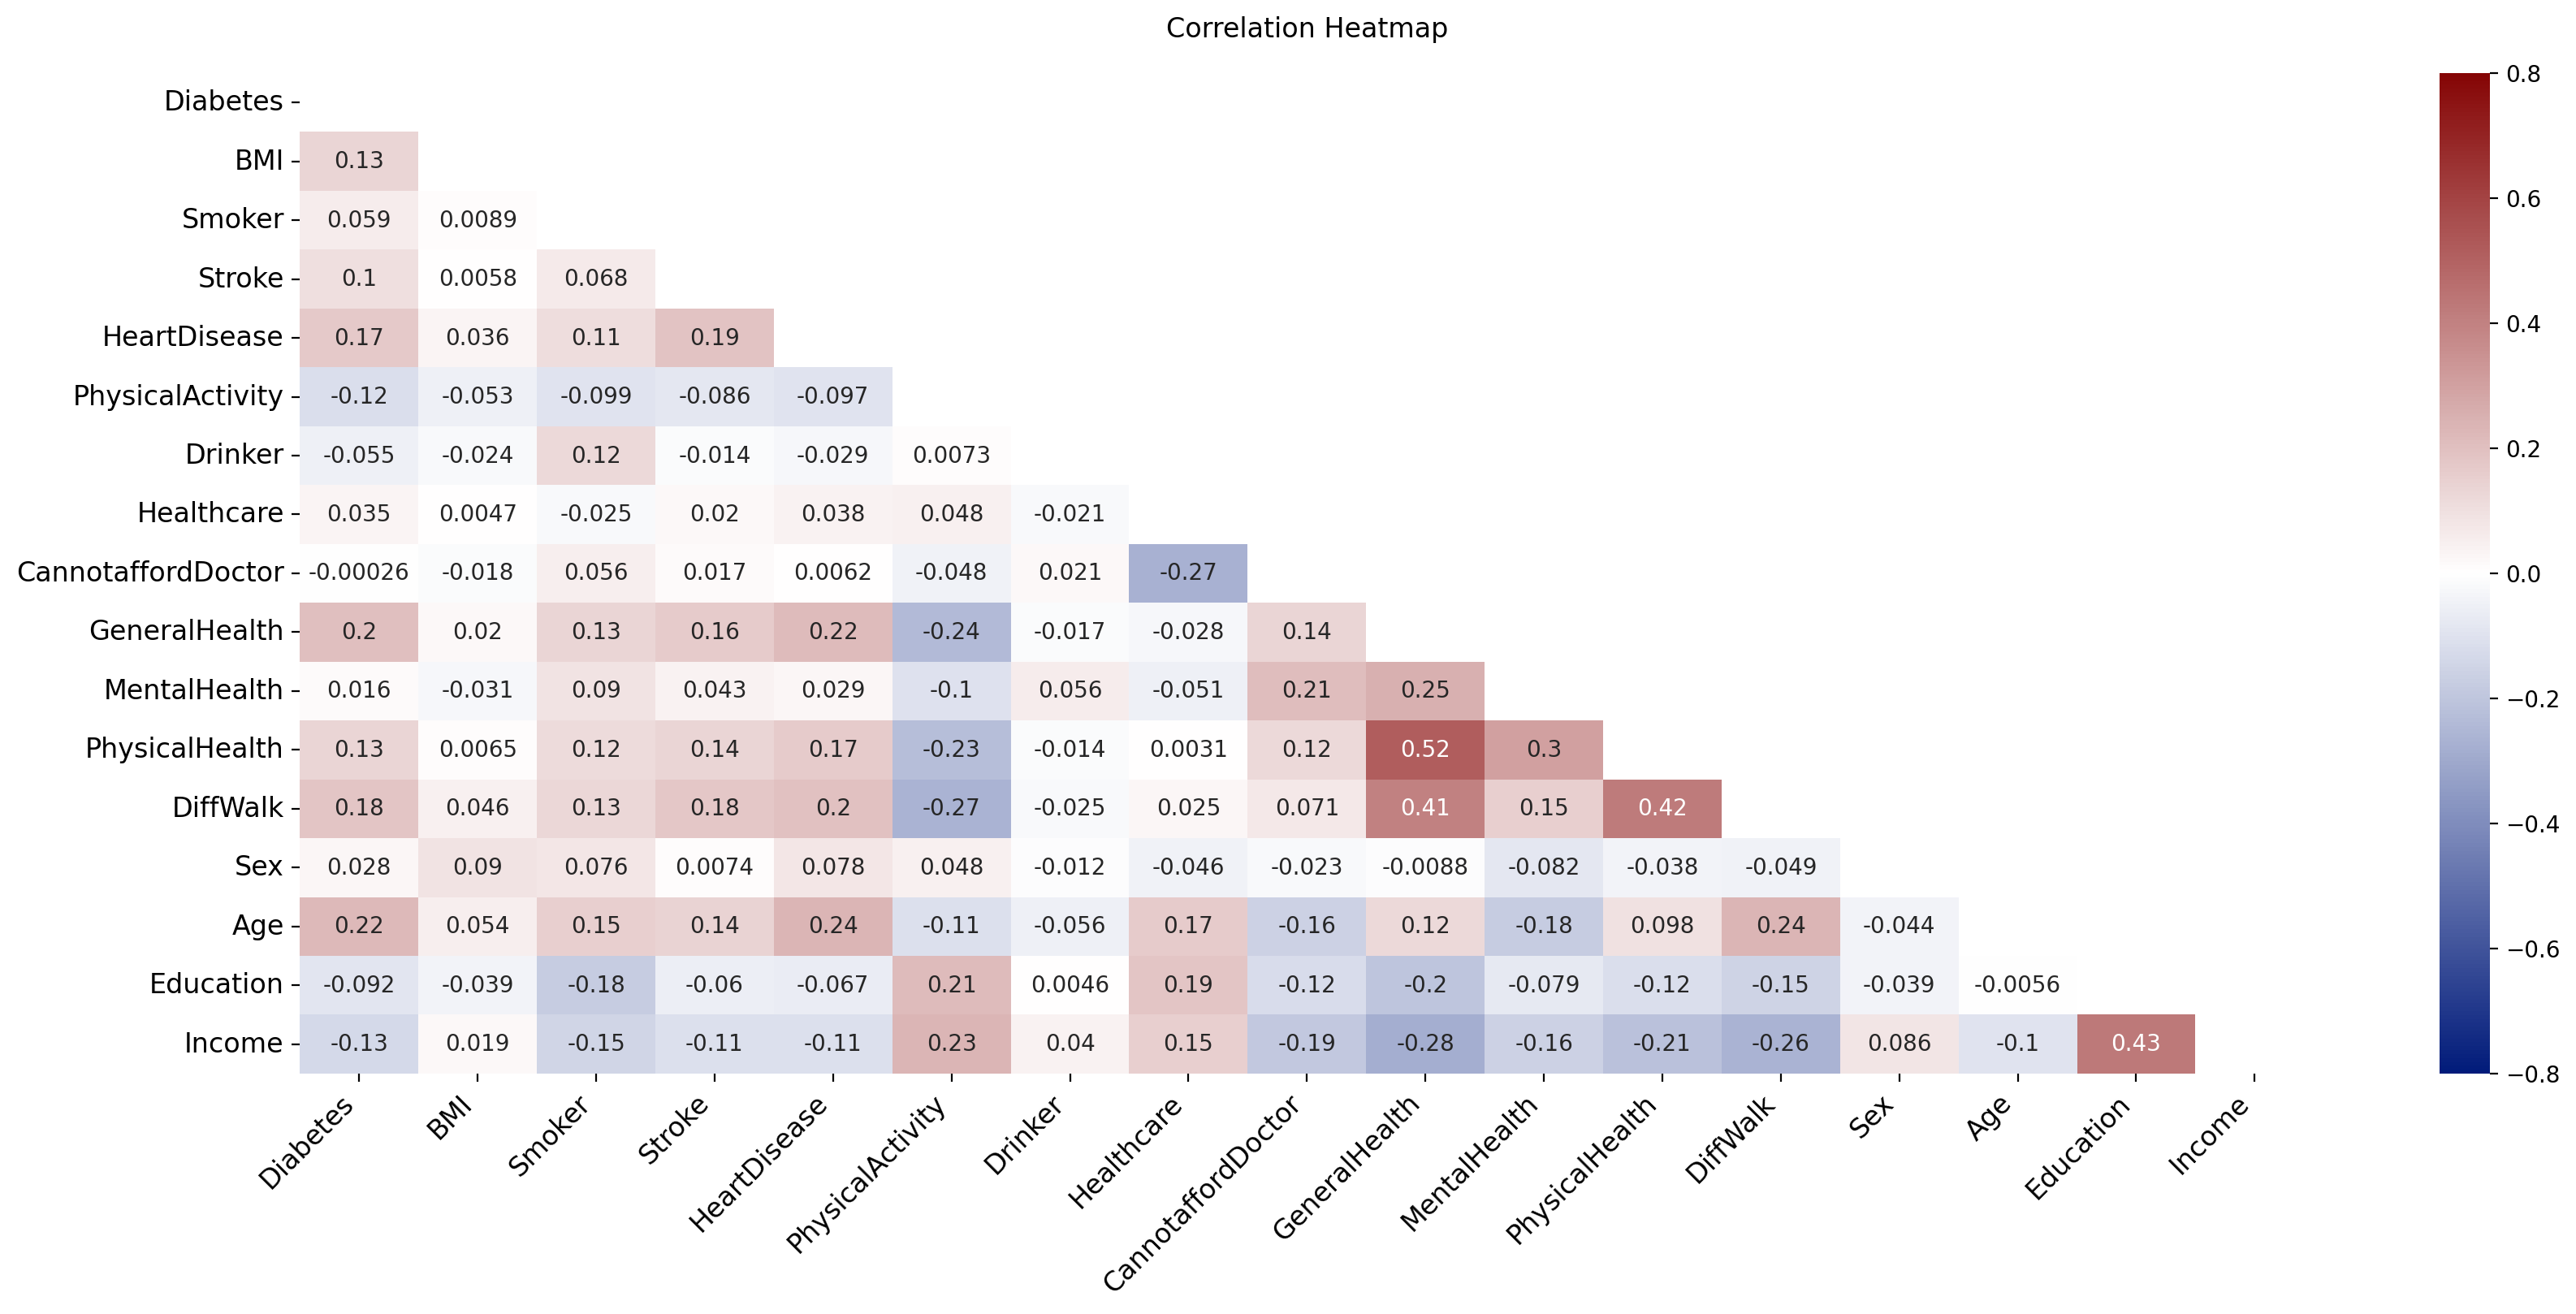

In [ ]:
data_heatmap = df_selected
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#011b7a', 'white', '#850505'])

mask = np.triu(np.ones_like(data_heatmap.corr(), dtype=bool))

lenghtsize = 20
fig, ax = plt.subplots(figsize=(lenghtsize,lenghtsize*.4), dpi=200)

heatmap = sns.heatmap(data_heatmap.corr(), cmap=custom_cmap, mask=mask, annot=True, vmin=-.8, vmax=.8)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=16);
ax.tick_params(axis='both', which='major', labelsize=12)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right');

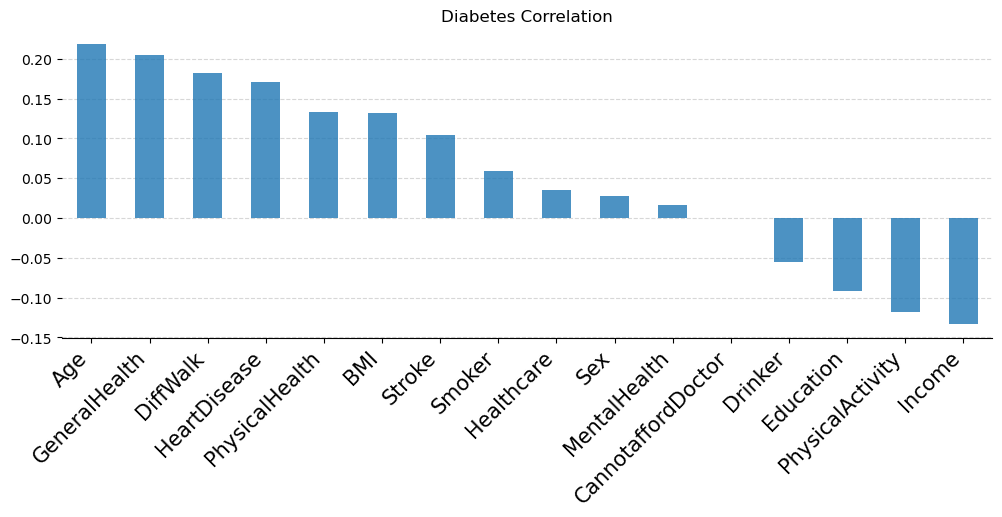

In [ ]:
(df_selected.drop('Diabetes', axis=1)
   .corrwith(df_selected.Diabetes)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

In [ ]:
pear_coor = (df_selected.drop('Diabetes', axis=1)
   .corrwith(df_selected.Diabetes)
   .abs()
   .sort_values(ascending=False))
pear_coor

Age                  0.22
GeneralHealth        0.20
DiffWalk             0.18
HeartDisease         0.17
PhysicalHealth       0.13
Income               0.13
BMI                  0.13
PhysicalActivity     0.12
Stroke               0.10
Education            0.09
Smoker               0.06
Drinker              0.06
Healthcare           0.03
Sex                  0.03
MentalHealth         0.02
CannotaffordDoctor   0.00
dtype: float64

## 4. Build model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
X=df_selected.drop("Diabetes",axis=1)
y=df_selected["Diabetes"]

In [ ]:
X

,BMI,Smoker,Stroke,HeartDisease,PhysicalActivity,Drinker,Healthcare,CannotaffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,DiffWalk,Sex,Age,Education,Income
1,27.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,13.00,4.00,5.00
2,26.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,3.00,2.00,0.00,0.00,8.00,6.00,10.00
4,22.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,2.00,0.00,0.00,5.00,5.00,5.00
6,23.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,13.00,6.00,8.00
7,28.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,13.00,4.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445122,22.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,30.00,0.00,1.00,11.00,6.00,8.00
445123,24.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,2.00,7.00,0.00,0.00,0.00,2.00,6.00,4.00
445124,30.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,15.00,0.00,0.00,1.00,10.00,6.00,9.00
445126,31.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,3.00,6.00,8.00


In [ ]:
X.shape, y.shape

((223287, 16), (223287,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156300, 16), (66987, 16), (156300,), (66987,))

In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [ ]:
X_train_sm.shape, y_train_sm.shape, X_test.shape, y_test.shape

((274520, 16), (274520,), (66987, 16), (66987,))

In [ ]:
from collections import Counter

In [ ]:
print("Tỷ lệ lớp trong y_train_sm:")
print(Counter(y_train_sm))

Tỷ lệ lớp trong y_train_sm:
Counter({0.0: 137260, 1.0: 137260})


In [ ]:
y_train_sm_series = pd.Series(y_train_sm)
print(y_train_sm_series.value_counts())
print(y_train_sm_series.value_counts(normalize=True))

Diabetes
0.00    137260
1.00    137260
Name: count, dtype: int64
Diabetes
0.00   0.50
1.00   0.50
Name: proportion, dtype: float64


## 4.1 Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_sm, y_train_sm)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
auc_lr = roc_auc_score(y_test, y_proba_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Results")
print(f"ROC AUC: {auc_lr}")
print("Classification Report:")
print(pd.DataFrame(report_lr).transpose())
print("Confusion Matrix:")
print(confusion_lr)

Logistic Regression Results
ROC AUC: 0.7796756751768312
Classification Report:
              precision  recall  f1-score   support
0.0                0.95    0.70      0.80 58,827.00
1.0                0.25    0.72      0.37  8,160.00
accuracy           0.70    0.70      0.70      0.70
macro avg          0.60    0.71      0.59 66,987.00
weighted avg       0.86    0.70      0.75 66,987.00
Confusion Matrix:
[[41021 17806]
 [ 2247  5913]]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

results = {
    "Model": ["Logistic Regression"],
    "ROC AUC": [auc_lr],
    "Precision": [precision_lr],
    "Recall": [recall_lr],
    "F1-Score": [f1_lr]
}

results_df1 = pd.DataFrame(results)
print(results_df1)

                 Model  ROC AUC  Precision  Recall  F1-Score
0  Logistic Regression     0.78       0.60    0.71      0.59


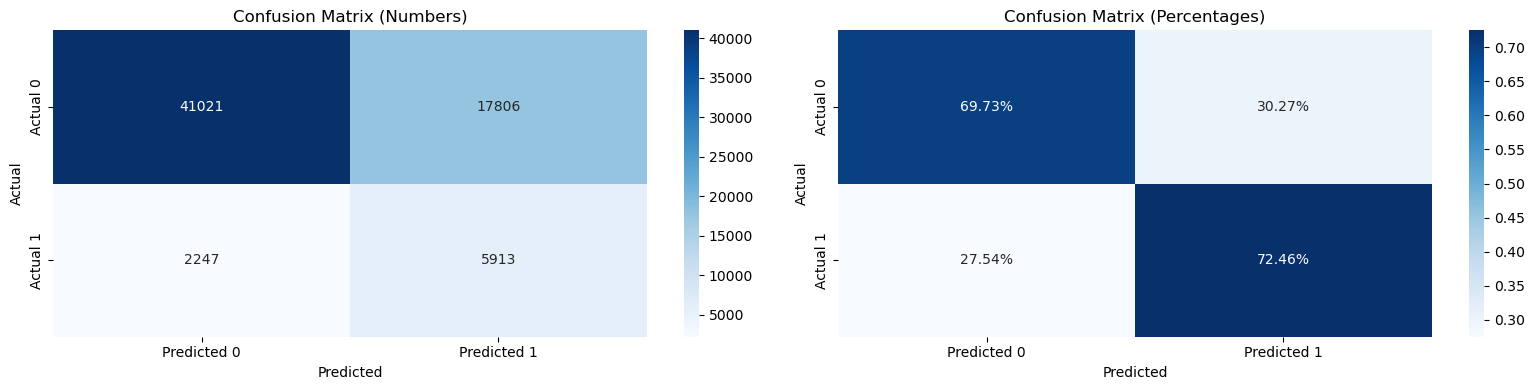

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot numbers and percentages side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot confusion matrix with numbers
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[0])
ax[0].set_title('Confusion Matrix (Numbers)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix with percentages
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[1])
ax[1].set_title('Confusion Matrix (Percentages)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 4.2 Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
auc_dt = roc_auc_score(y_test, y_proba_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Results")
print(f"ROC AUC: {auc_dt}")
print("Classification Report:")
print(pd.DataFrame(report_dt).transpose())
print("Confusion Matrix:")
print(confusion_dt)

Decision Tree Results
ROC AUC: 0.5765940871988553
Classification Report:
              precision  recall  f1-score   support
0.0                0.90    0.89      0.89 58,827.00
1.0                0.24    0.25      0.25  8,160.00
accuracy           0.81    0.81      0.81      0.81
macro avg          0.57    0.57      0.57 66,987.00
weighted avg       0.82    0.81      0.82 66,987.00
Confusion Matrix:
[[52532  6295]
 [ 6129  2031]]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
precision_dt = report_dt['macro avg']['precision']
recall_dt = report_dt['macro avg']['recall']
f1_dt = report_dt['macro avg']['f1-score']

results_dt = pd.DataFrame({
    "Model": ["Decision Tree"],
    "ROC AUC": [auc_dt],
    "Precision": [precision_dt],
    "Recall": [recall_dt],
    "F1-Score": [f1_dt]
})

results_df1 = pd.concat([results_df1, results_dt], ignore_index=True)
print(results_df1)

                 Model  ROC AUC  Precision  Recall  F1-Score
0  Logistic Regression     0.78       0.60    0.71      0.59
1        Decision Tree     0.58       0.57    0.57      0.57


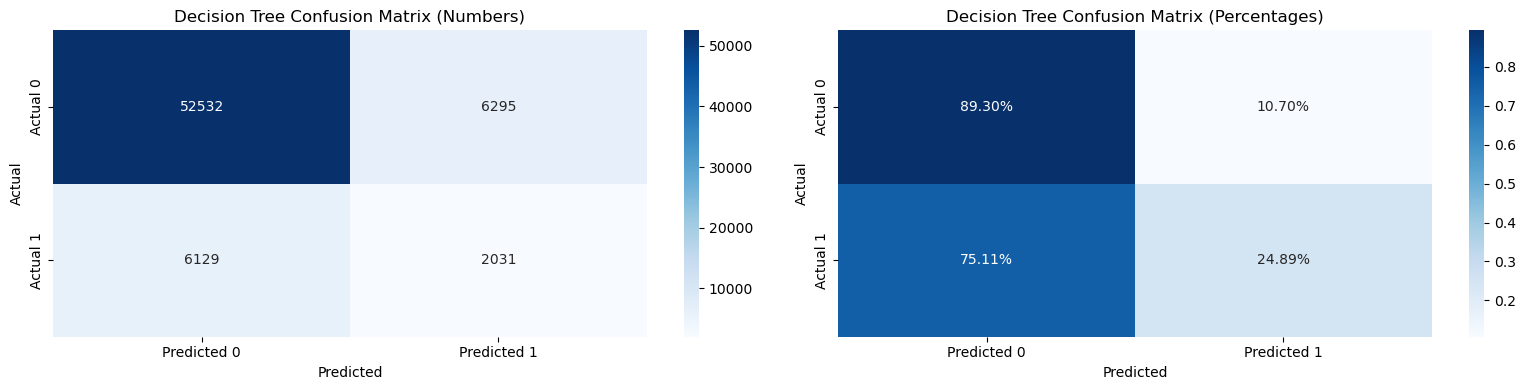

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt_norm = conf_matrix_dt.astype('float') / conf_matrix_dt.sum(axis=1)[:, np.newaxis]

# Plot numbers and percentages side by side for Decision Tree
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot confusion matrix with numbers
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix (Numbers)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix with percentages
sns.heatmap(conf_matrix_dt_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix (Percentages)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 4.3 Random forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
auc_rf = roc_auc_score(y_test, y_proba_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Results")
print(f"ROC AUC: {auc_rf}")
print("Classification Report:")
print(pd.DataFrame(report_rf).transpose())
print("Confusion Matrix:")
print(confusion_rf)

Random Forest Results
ROC AUC: 0.7163228025796479
Classification Report:
              precision  recall  f1-score   support
0.0                0.89    0.95      0.92 58,827.00
1.0                0.28    0.14      0.19  8,160.00
accuracy           0.85    0.85      0.85      0.85
macro avg          0.59    0.55      0.55 66,987.00
weighted avg       0.81    0.85      0.83 66,987.00
Confusion Matrix:
[[55834  2993]
 [ 6982  1178]]


In [ ]:
precision_rf = report_rf['macro avg']['precision']
recall_rf = report_rf['macro avg']['recall']
f1_rf = report_rf['macro avg']['f1-score']

results_rf = pd.DataFrame({
    "Model": ["Random Forest"],
    "ROC AUC": [auc_rf],
    "Precision": [precision_rf],
    "Recall": [recall_rf],
    "F1-Score": [f1_rf]
})

results_df1 = pd.concat([results_df1, results_rf], ignore_index=True)
print(results_df1)

                 Model  ROC AUC  Precision  Recall  F1-Score
0  Logistic Regression     0.78       0.60    0.71      0.59
1        Decision Tree     0.58       0.57    0.57      0.57
2        Random Forest     0.72       0.59    0.55      0.55


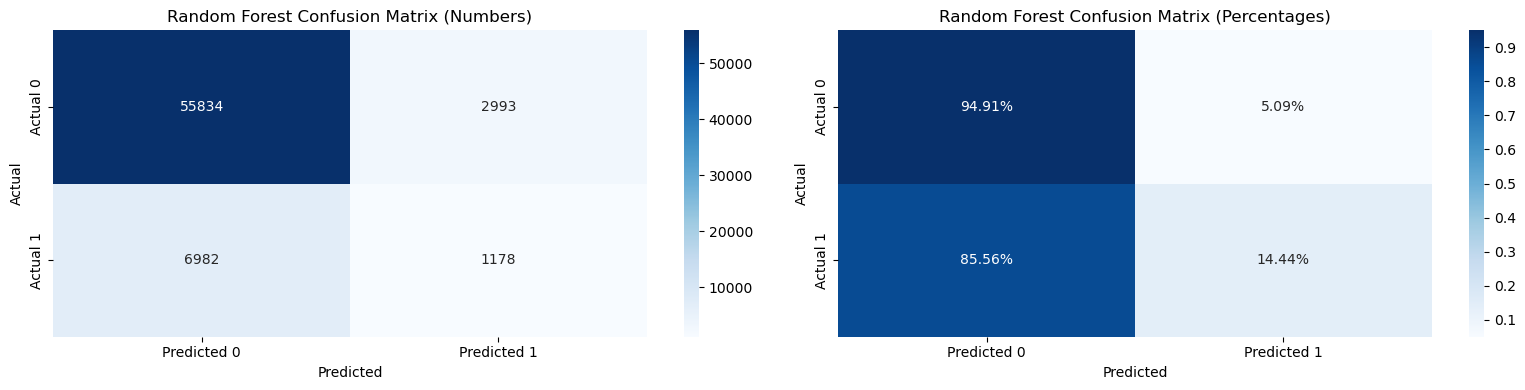

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf_norm = conf_matrix_rf.astype('float') / conf_matrix_rf.sum(axis=1)[:, np.newaxis]

# Plot numbers and percentages side by side for Random Forest
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot confusion matrix with numbers
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix (Numbers)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix with percentages
sns.heatmap(conf_matrix_rf_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix (Percentages)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 4.4 KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_sm, y_train_sm)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
auc_knn = roc_auc_score(y_test, y_proba_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Results")
print(f"ROC AUC: {auc_knn}")
print("Classification Report:")
print(pd.DataFrame(report_knn).transpose())
print("Confusion Matrix:")
print(confusion_knn)

KNN Results
ROC AUC: 0.6681596337899398
Classification Report:
              precision  recall  f1-score   support
0.0                0.91    0.85      0.88 58,827.00
1.0                0.25    0.36      0.30  8,160.00
accuracy           0.79    0.79      0.79      0.79
macro avg          0.58    0.61      0.59 66,987.00
weighted avg       0.83    0.79      0.81 66,987.00
Confusion Matrix:
[[50019  8808]
 [ 5202  2958]]


In [ ]:
precision_knn = report_knn['macro avg']['precision']
recall_knn = report_knn['macro avg']['recall']
f1_knn = report_knn['macro avg']['f1-score']

results_knn = pd.DataFrame({
    "Model": ["KNN"],
    "ROC AUC": [auc_knn],
    "Precision": [precision_knn],
    "Recall": [recall_knn],
    "F1-Score": [f1_knn]
})

results_df1 = pd.concat([results_df1, results_knn], ignore_index=True)
print(results_df1)

                 Model  ROC AUC  Precision  Recall  F1-Score
0  Logistic Regression     0.78       0.60    0.71      0.59
1        Decision Tree     0.58       0.57    0.57      0.57
2        Random Forest     0.72       0.59    0.55      0.55
3                  KNN     0.67       0.58    0.61      0.59


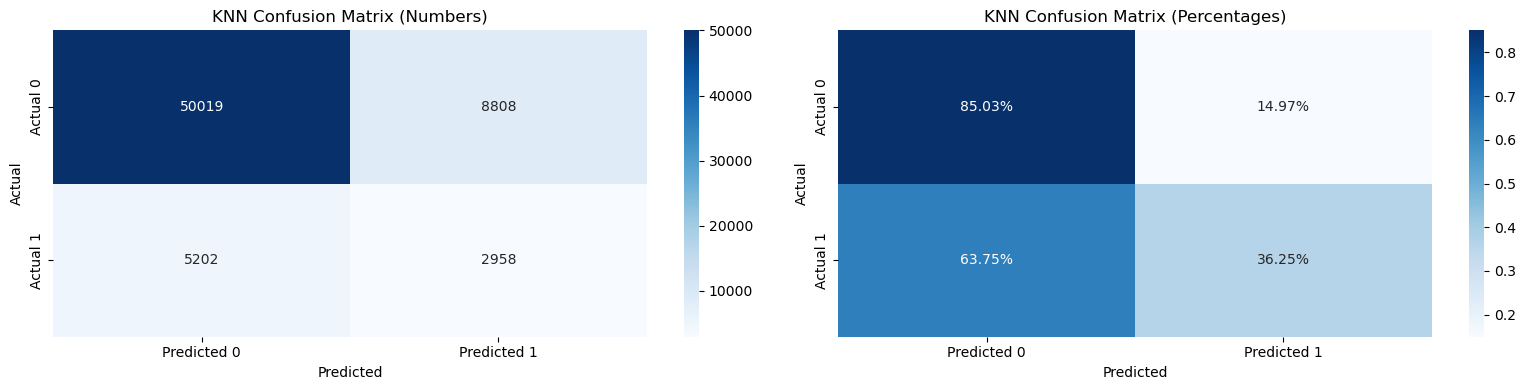

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn_norm = conf_matrix_knn.astype('float') / conf_matrix_knn.sum(axis=1)[:, np.newaxis]

# Plot numbers and percentages side by side for KNN
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot confusion matrix with numbers
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[0])
ax[0].set_title('KNN Confusion Matrix (Numbers)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix with percentages
sns.heatmap(conf_matrix_knn_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[1])
ax[1].set_title('KNN Confusion Matrix (Percentages)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 4.5 LightGBM

In [ ]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_sm, y_train_sm)
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate LightGBM
report_lgb = classification_report(y_test, y_pred_lgb, output_dict=True)
auc_lgb = roc_auc_score(y_test, y_proba_lgb)
confusion_lgb = confusion_matrix(y_test, y_pred_lgb)

print("LightGBM Results")
print(f"ROC AUC: {auc_lgb}")
print("Classification Report:")
print(pd.DataFrame(report_lgb).transpose())
print("Confusion Matrix:")
print(confusion_lgb)

[LightGBM] [Info] Number of positive: 137260, number of negative: 137260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3876
[LightGBM] [Info] Number of data points in the train set: 274520, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Results
ROC AUC: 0.7657648677894671
Classification Report:
              precision  recall  f1-score   support
0.0                0.89    0.98      0.93 58,827.00
1.0                0.43    0.09      0.15  8,160.00
accuracy           0.87    0.87      0.87      0.87
macro avg          0.66    0.54      0.54 66,987.00
weighted avg       0.83    0.87      0.84 66,987.00
Confusion Matrix:
[[57818  1009]
 [ 7405   755]]


In [ ]:
precision_lgb = report_lgb['macro avg']['precision']
recall_lgb = report_lgb['macro avg']['recall']
f1_lgb = report_lgb['macro avg']['f1-score']

results_lgb = pd.DataFrame({
    "Model": ["LightGBM"],
    "ROC AUC": [auc_lgb],
    "Precision": [precision_lgb],
    "Recall": [recall_lgb],
    "F1-Score": [f1_lgb]
})

results_df1 = pd.concat([results_df1, results_lgb], ignore_index=True)
print(results_df1)

                 Model  ROC AUC  Precision  Recall  F1-Score
0  Logistic Regression     0.78       0.60    0.71      0.59
1        Decision Tree     0.58       0.57    0.57      0.57
2        Random Forest     0.72       0.59    0.55      0.55
3                  KNN     0.67       0.58    0.61      0.59
4             LightGBM     0.77       0.66    0.54      0.54


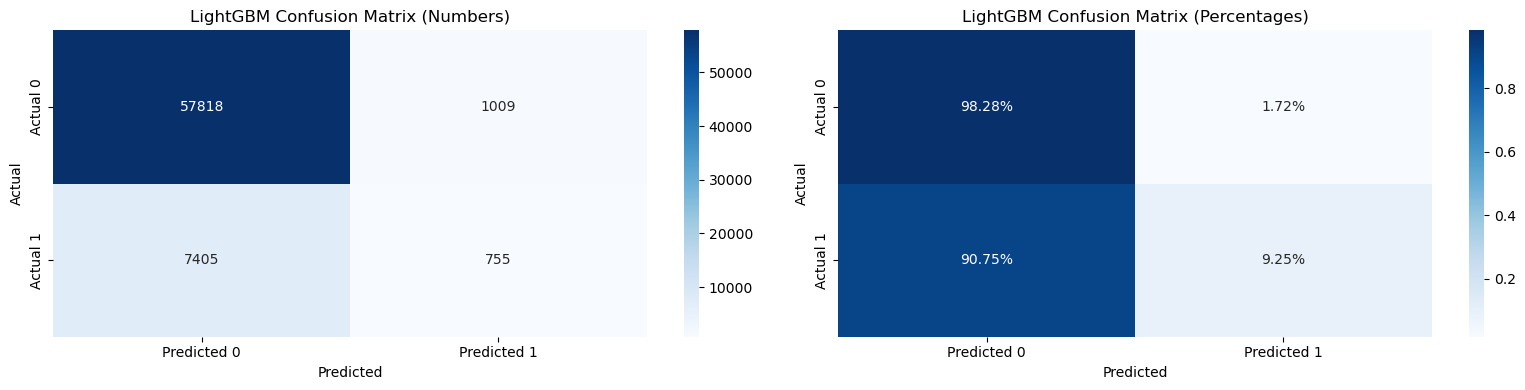

In [ ]:
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
conf_matrix_lgb_norm = conf_matrix_lgb.astype('float') / conf_matrix_lgb.sum(axis=1)[:, np.newaxis]

# Plot numbers and percentages side by side for LightGBM
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot confusion matrix with numbers
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[0])
ax[0].set_title('LightGBM Confusion Matrix (Numbers)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix with percentages
sns.heatmap(conf_matrix_lgb_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[1])
ax[1].set_title('LightGBM Confusion Matrix (Percentages)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 4.6 Catboost

In [ ]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import catboost as cb

# Train CatBoost
cb_model = cb.CatBoostClassifier(random_state=42, verbose=0)
cb_model.fit(X_train_sm, y_train_sm)
y_pred_cb = cb_model.predict(X_test)
y_proba_cb = cb_model.predict_proba(X_test)[:, 1]

# Evaluate CatBoost
report_cb = classification_report(y_test, y_pred_cb, output_dict=True)
auc_cb = roc_auc_score(y_test, y_proba_cb)
confusion_cb = confusion_matrix(y_test, y_pred_cb)

print("CatBoost Results")
print(f"ROC AUC: {auc_cb}")
print("Classification Report:")
print(pd.DataFrame(report_cb).transpose())
print("Confusion Matrix:")
print(confusion_cb)

CatBoost Results
ROC AUC: 0.7652929029270605
Classification Report:
              precision  recall  f1-score   support
0.0                0.89    0.99      0.93 58,827.00
1.0                0.47    0.08      0.14  8,160.00
accuracy           0.88    0.88      0.88      0.88
macro avg          0.68    0.54      0.54 66,987.00
weighted avg       0.83    0.88      0.84 66,987.00
Confusion Matrix:
[[58038   789]
 [ 7472   688]]


In [ ]:
precision_cb = report_cb['macro avg']['precision']
recall_cb = report_cb['macro avg']['recall']
f1_cb = report_cb['macro avg']['f1-score']

results_cb = pd.DataFrame({
    "Model": ["CatBoost"],
    "ROC AUC": [auc_cb],
    "Precision": [precision_cb],
    "Recall": [recall_cb],
    "F1-Score": [f1_cb]
})

results_df1 = pd.concat([results_df1, results_cb], ignore_index=True)
print(results_df1)

                 Model  ROC AUC  Precision  Recall  F1-Score
0  Logistic Regression     0.78       0.60    0.71      0.59
1        Decision Tree     0.58       0.57    0.57      0.57
2        Random Forest     0.72       0.59    0.55      0.55
3                  KNN     0.67       0.58    0.61      0.59
4             LightGBM     0.77       0.66    0.54      0.54
5             CatBoost     0.77       0.68    0.54      0.54


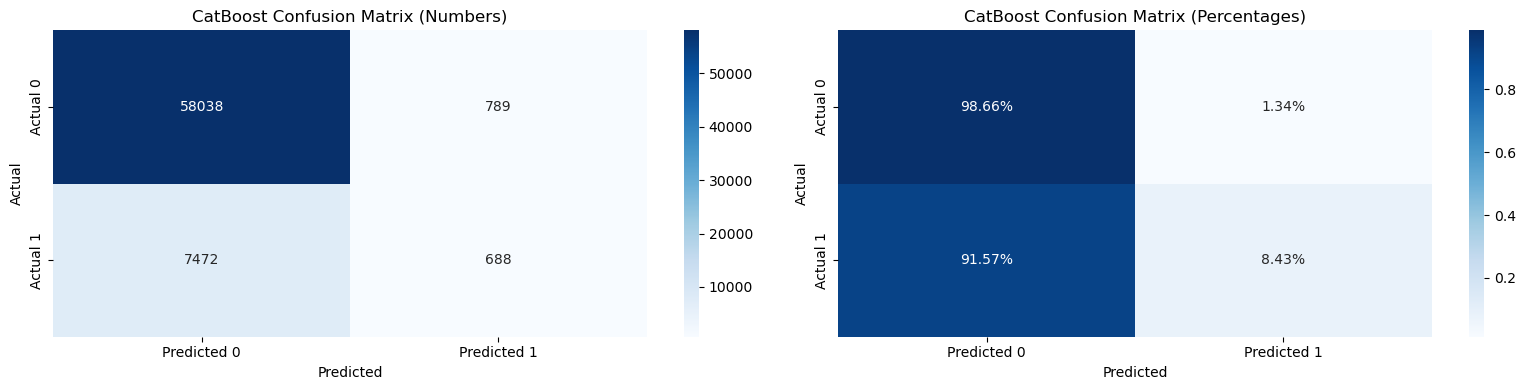

In [ ]:
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
conf_matrix_cb_norm = conf_matrix_cb.astype('float') / conf_matrix_cb.sum(axis=1)[:, np.newaxis]

# Plot numbers and percentages side by side for CatBoost
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot confusion matrix with numbers
sns.heatmap(conf_matrix_cb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[0])
ax[0].set_title('CatBoost Confusion Matrix (Numbers)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix with percentages
sns.heatmap(conf_matrix_cb_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax[1])
ax[1].set_title('CatBoost Confusion Matrix (Percentages)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## kết quả tổng hợp

In [ ]:
results_df1

,Model,ROC AUC,Precision,Recall,F1-Score
0,Logistic Regression,0.78,0.60,0.71,0.59
1,Decision Tree,0.58,0.57,0.57,0.57
2,Random Forest,0.72,0.59,0.55,0.55
3,KNN,0.67,0.58,0.61,0.59
4,LightGBM,0.77,0.66,0.54,0.54
5,CatBoost,0.77,0.68,0.54,0.54


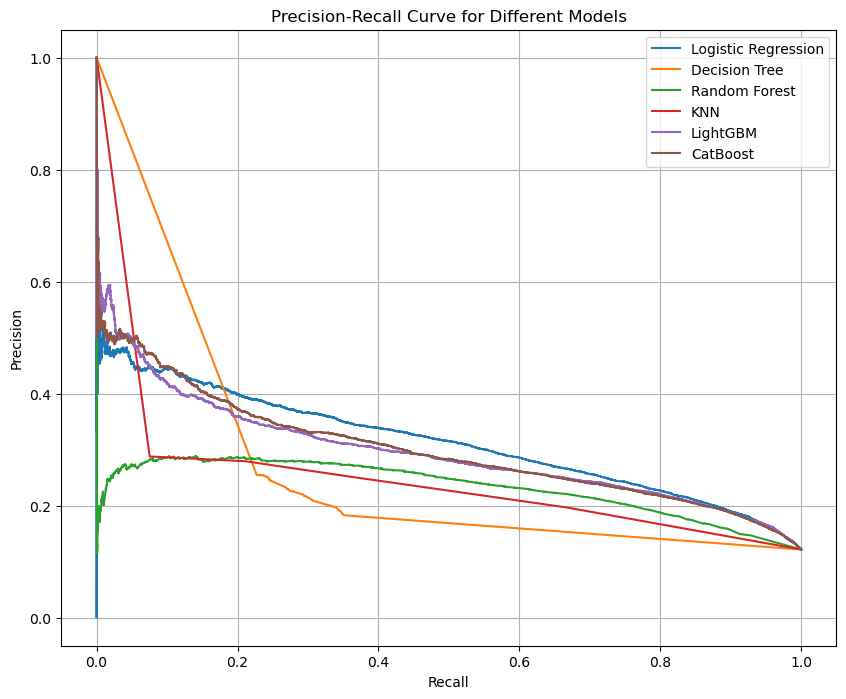

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
models = {
    "Logistic Regression": y_proba_lr,
    "Decision Tree": y_proba_dt,
    "Random Forest": y_proba_rf,
    "KNN": y_proba_knn,
    "LightGBM": y_proba_lgb,
    "CatBoost": y_proba_cb
}

plt.figure(figsize=(10, 8))

for model_name, y_proba in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()

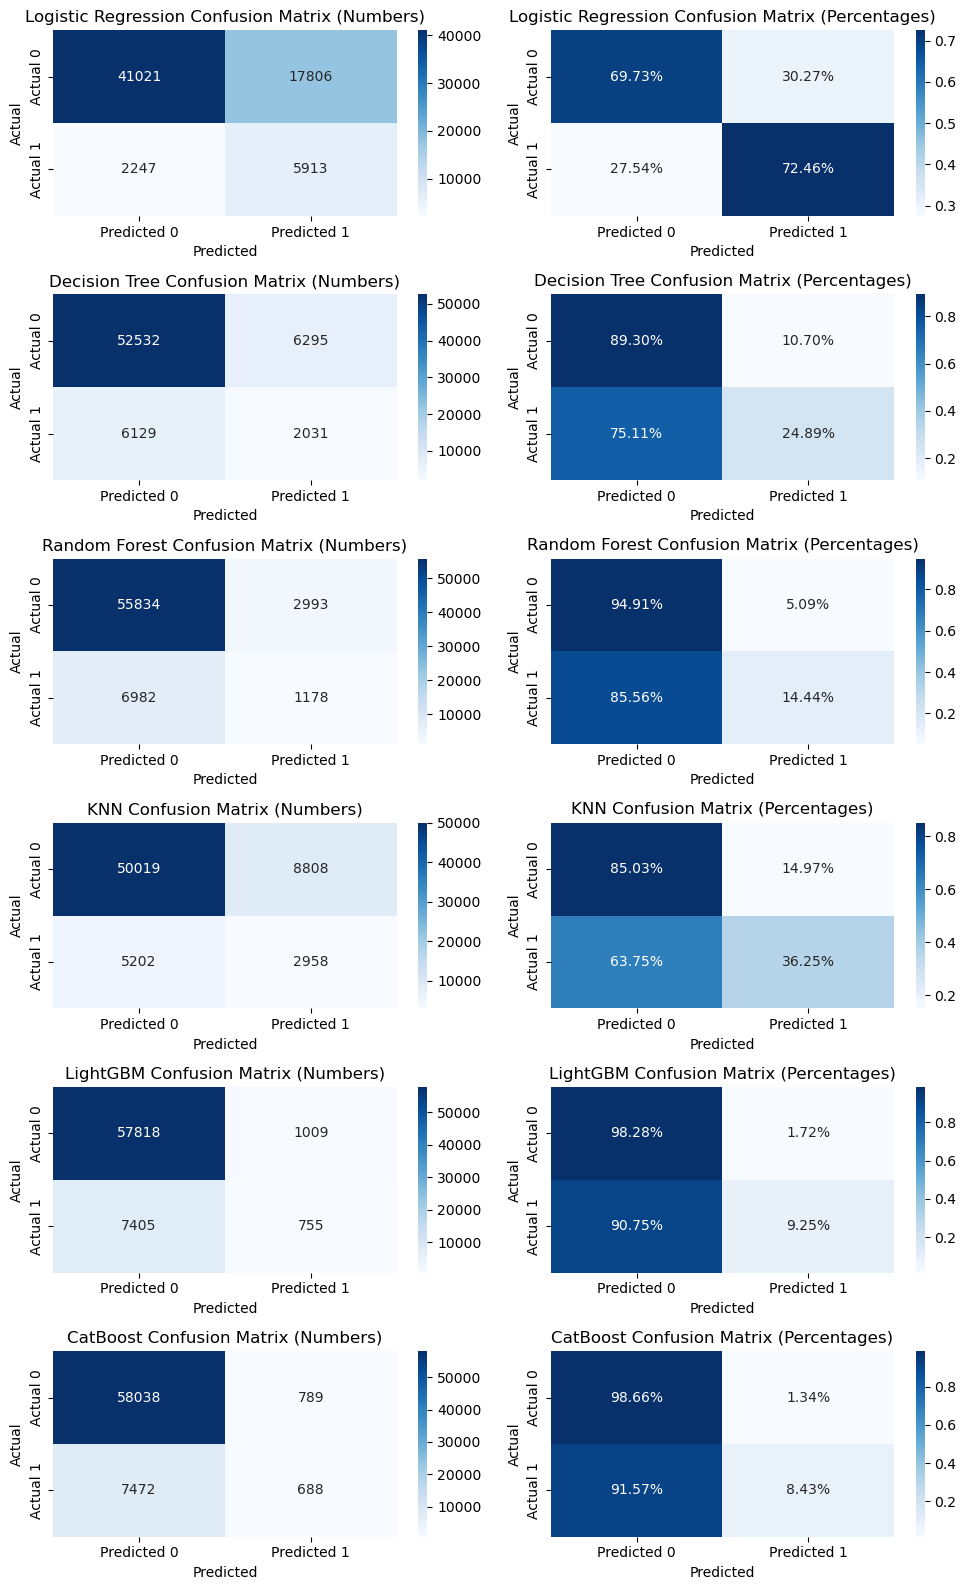

In [ ]:
models = {
    'Logistic Regression': (y_test, y_pred_lr),
    'Decision Tree': (y_test, y_pred_dt),
    'Random Forest': (y_test, y_pred_rf),
    'KNN': (y_test, y_pred_knn),
    'LightGBM': (y_test, y_pred_lgb),
    'CatBoost': (y_test, y_pred_cb)
}

# Plot all confusion matrices
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 16))
axes = axes.flatten()

for i, (model_name, (y_true, y_pred)) in enumerate(models.items()):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix with numbers
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[i*2])
    axes[i*2].set_title(f'{model_name} Confusion Matrix (Numbers)')
    axes[i*2].set_xlabel('Predicted')
    axes[i*2].set_ylabel('Actual')

    # Plot confusion matrix with percentages
    sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f'{model_name} Confusion Matrix (Percentages)')
    axes[i*2 + 1].set_xlabel('Predicted')
    axes[i*2 + 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 5. Tuning

In [ ]:
from catboost import CatBoostClassifier

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

param_grid_lgb = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

param_grid_cat = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200]
}

# GridSearchCV
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

best_models = {}
best_params = {}
best_models['Logistic Regression'], best_params['Logistic Regression'] = perform_grid_search(LogisticRegression(random_state=42), param_grid_lr, X_train_sm, y_train_sm)
best_models['Decision Tree'], best_params['Decision Tree'] = perform_grid_search(DecisionTreeClassifier(random_state=42), param_grid_dt, X_train_sm, y_train_sm)
best_models['KNN'], best_params['KNN'] = perform_grid_search(KNeighborsClassifier(), param_grid_knn, X_train_sm, y_train_sm)
best_models['Random Forest'], best_params['Random Forest'] = perform_grid_search(RandomForestClassifier(random_state=42), param_grid_rf, X_train_sm, y_train_sm)
best_models['LightGBM'], best_params['LightGBM'] = perform_grid_search(lgb.LGBMClassifier(random_state=42), param_grid_lgb, X_train_sm, y_train_sm)
best_models['CatBoost'], best_params['CatBoost'] = perform_grid_search(CatBoostClassifier(random_state=42, verbose=0), param_grid_cat, X_train_sm, y_train_sm)

#

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 137260, number of negative: 137260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3876
[LightGBM] [Info] Number of data points in the train set: 274520, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
print("Best Params for Logistic Regression:", best_params['Logistic Regression'])
print("Best Params for Decision Tree:", best_params['Decision Tree'])
print("Best Params for KNN:", best_params['KNN'])
print("Best Params for Random Forest:", best_params['Random Forest'])
print("Best Params for LightGBM:", best_params['LightGBM'])
print("Best Params for CatBoost:", best_params['CatBoost'])

Best Params for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Best Params for Decision Tree: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Params for KNN: {'n_neighbors': 5, 'weights': 'distance'}
Best Params for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Params for LightGBM: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 100}
Best Params for CatBoost: {'depth': 10, 'iterations': 100, 'learning_rate': 0.2}


In [ ]:
best_results = {}

for name, model in best_models.items():
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)
    confusion = confusion_matrix(y_test, y_pred)
    best_results[name] = {
        "roc_auc": auc,
        "classification_report": report,
        "confusion_matrix": confusion
    }

summary_data_best = []

for name, metrics in best_results.items():
    report = metrics['classification_report']
    auc = metrics['roc_auc']
    row = {
        "Model": name,
        "ROC AUC": auc,
        "Precision (macro avg)": report["macro avg"]["precision"],
        "Recall (macro avg)": report["macro avg"]["recall"],
        "F1-Score (macro avg)": report["macro avg"]["f1-score"]
    }
    summary_data_best.append(row)

summary_df_best = pd.DataFrame(summary_data_best)
summary_df_best.set_index("Model", inplace=True)
summary_df_best

[LightGBM] [Info] Number of positive: 137260, number of negative: 137260
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3876
[LightGBM] [Info] Number of data points in the train set: 274520, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,ROC AUC,Precision (macro avg),Recall (macro avg),F1-Score (macro avg)
Model,,,,
Logistic Regression,0.78,0.60,0.71,0.59
Decision Tree,0.67,0.58,0.56,0.57
KNN,0.66,0.58,0.60,0.59
Random Forest,0.72,0.59,0.55,0.55
LightGBM,0.77,0.66,0.54,0.54
CatBoost,0.76,0.66,0.54,0.55


## 6. Thresholds

In [ ]:
log_reg_tuned = best_models['Logistic Regression']
y_proba_lr = log_reg_tuned.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr)

# Tính toán F1-Score cho các ngưỡng khác nhau, tránh lỗi chia cho 0
f1_scores = []
for p, r in zip(precision, recall):
    if p + r > 0:
        f1_scores.append(2 * (p * r) / (p + r))
    else:
        f1_scores.append(0)

f1_scores = np.array(f1_scores)

# Chọn ngưỡng với F1-Score cao nhất
optimal_idx_f1 = np.argmax(f1_scores)
optimal_threshold_f1 = thresholds[optimal_idx_f1]

# Áp dụng ngưỡng mới để dự đoán
y_pred_optimal_f1 = (y_proba_lr >= optimal_threshold_f1).astype(int)

# Đánh giá mô hình với ngưỡng mới
classification_report_optimal_f1 = classification_report(y_test, y_pred_optimal_f1, output_dict=True, zero_division=1)
confusion_matrix_optimal_f1 = confusion_matrix(y_test, y_pred_optimal_f1)

print("Optimal Threshold for Best F1-Score:", optimal_threshold_f1)
print("Classification Report with Optimal Threshold for Best F1-Score:")
print(pd.DataFrame(classification_report_optimal_f1).transpose())
print("Confusion Matrix with Optimal Threshold for Best F1-Score:")
print(confusion_matrix_optimal_f1)

# # Precision-Recall Curve
# plt.figure(figsize=(10, 8))
# plt.plot(recall, precision, marker='.', label='Logistic Regression')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve for Logistic Regression')
# plt.legend()
# plt.grid(True)
# plt.show()

# # F1-Score theo ngưỡng
# plt.figure(figsize=(10, 8))
# plt.plot(thresholds, f1_scores[:-1], marker='.', label='F1-Score')
# plt.xlabel('Threshold')
# plt.ylabel('F1-Score')
# plt.title('F1-Score by Threshold for Logistic Regression')
# plt.legend()
# plt.grid(True)
# plt.show()

Optimal Threshold for Best F1-Score: 0.6303868880947048
Classification Report with Optimal Threshold for Best F1-Score:
              precision  recall  f1-score   support
0.0                0.93    0.84      0.88 58,827.00
1.0                0.31    0.53      0.39  8,160.00
accuracy           0.80    0.80      0.80      0.80
macro avg          0.62    0.68      0.63 66,987.00
weighted avg       0.85    0.80      0.82 66,987.00
Confusion Matrix with Optimal Threshold for Best F1-Score:
[[49227  9600]
 [ 3865  4295]]


In [ ]:
results = {
    "Model": ["Logistic Regression"],
    "ROC AUC": [roc_auc_score(y_test, y_proba_lr)],
    "Precision": [classification_report_optimal_f1['macro avg']['precision']],
    "Recall": [classification_report_optimal_f1['macro avg']['recall']],
    "F1-Score": [classification_report_optimal_f1['macro avg']['f1-score']]
}

results_df = pd.DataFrame(results)
print("Optimal Threshold for Best F1-Score:", optimal_threshold_f1)
results_df

Optimal Threshold for Best F1-Score: 0.6303868880947048


,Model,ROC AUC,Precision,Recall,F1-Score
0,Logistic Regression,0.78,0.62,0.68,0.63


In [ ]:
# Optimal Threshold for Best F1-Score: 0.6303868880947048
# Model	ROC AUC	Precision	Recall	F1-Score
# 0	Logistic Regression	0.78	0.62	0.68	0.63

Precision: Tăng từ 0.60 lên 0.62, có nghĩa là số lượng dương tính giả giảm, điều này tốt cho việc tránh chẩn đoán nhầm.
Recall: Giảm từ 0.71 xuống 0.68, có nghĩa là số lượng âm tính giả tăng nhẹ, điều này có thể không tốt vì có thể bỏ sót một số trường hợp bệnh thật sự.
F1-Score: Tăng từ 0.59 lên 0.63, cho thấy sự cân bằng tổng thể giữa Precision và Recall được cải thiện.
-> yêu cầu không bỏ sót các trường hợp mắc bệnh nên duy trì ngưỡng ban đầu

tối đa hóa Recall để không bỏ sót bất kỳ trường hợp dương tính nào (giảm False Negatives) và cũng muốn nắm bắt được các trường hợp âm tính giả (False Positives). Tuy nhiên, việc tối đa hóa cả hai điều này cùng lúc là không thực tế, vì tăng Recall thường dẫn đến giảm Precision (tăng False Positives).
-> có thể điều chỉnh threshold để đạt được Recall gần tối đa trong khi vẫn giữ Precision ở mức chấp nhận được.

## 7. Important features

In [ ]:
log_reg_tuned = best_models['Logistic Regression']

# Lấy các hệ số của mô hình
coefficients = log_reg_tuned.coef_[0]

# Lấy tên các đặc trưng
feature_names = X_train.columns

# Tạo DataFrame để hiển thị các đặc trưng và hệ số tương ứng
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Thêm cột tuyệt đối giá trị của hệ số để dễ sắp xếp
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])

# Sắp xếp các đặc trưng theo giá trị tuyệt đối của hệ số
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Hiển thị các đặc trưng quan trọng
print(feature_importance)


               Feature  Coefficient  Absolute Coefficient
13                 Age         0.71                  0.71
0                  BMI         0.44                  0.44
8        GeneralHealth         0.34                  0.34
15              Income        -0.20                  0.20
5              Drinker        -0.20                  0.20
3         HeartDisease         0.14                  0.14
12                 Sex         0.12                  0.12
6           Healthcare         0.09                  0.09
11            DiffWalk         0.08                  0.08
14           Education        -0.07                  0.07
4     PhysicalActivity        -0.07                  0.07
2               Stroke         0.03                  0.03
9         MentalHealth         0.03                  0.03
7   CannotaffordDoctor        -0.02                  0.02
1               Smoker        -0.02                  0.02
10      PhysicalHealth         0.00                  0.00
